In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
warnings.filterwarnings('ignore')
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score

import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier


Using TensorFlow backend.


In [2]:
df=pd.read_csv('weatherAUS.csv')

In [3]:
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,0.0,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,0.0,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,0.0,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,1.0,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,0.2,No


In [4]:
df.tail()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow
145455,2017-06-21,Uluru,2.8,23.4,0.0,NaN,NaN,E,31.0,SE,...,24.0,1024.6,1020.3,NaN,NaN,10.1,22.4,No,0.0,No
145456,2017-06-22,Uluru,3.6,25.3,0.0,NaN,NaN,NNW,22.0,SE,...,21.0,1023.5,1019.1,NaN,NaN,10.9,24.5,No,0.0,No
145457,2017-06-23,Uluru,5.4,26.9,0.0,NaN,NaN,N,37.0,SE,...,24.0,1021.0,1016.8,NaN,NaN,12.5,26.1,No,0.0,No
145458,2017-06-24,Uluru,7.8,27.0,0.0,NaN,NaN,SE,28.0,SSE,...,24.0,1019.4,1016.5,3.0,2.0,15.1,26.0,No,0.0,No
145459,2017-06-25,Uluru,14.9,NaN,0.0,NaN,NaN,NaN,NaN,ESE,...,36.0,1020.2,1017.9,8.0,8.0,15.0,20.9,No,NaN,NaN


In [5]:
df.shape

(145460, 24)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 24 columns):
Date             145460 non-null object
Location         145460 non-null object
MinTemp          143975 non-null float64
MaxTemp          144199 non-null float64
Rainfall         142199 non-null float64
Evaporation      82670 non-null float64
Sunshine         75625 non-null float64
WindGustDir      135134 non-null object
WindGustSpeed    135197 non-null float64
WindDir9am       134894 non-null object
WindDir3pm       141232 non-null object
WindSpeed9am     143693 non-null float64
WindSpeed3pm     142398 non-null float64
Humidity9am      142806 non-null float64
Humidity3pm      140953 non-null float64
Pressure9am      130395 non-null float64
Pressure3pm      130432 non-null float64
Cloud9am         89572 non-null float64
Cloud3pm         86102 non-null float64
Temp9am          143693 non-null float64
Temp3pm          141851 non-null float64
RainToday        142199 non-null obje

In [7]:
df.dtypes

Date              object
Location          object
MinTemp          float64
MaxTemp          float64
Rainfall         float64
Evaporation      float64
Sunshine         float64
WindGustDir       object
WindGustSpeed    float64
WindDir9am        object
WindDir3pm        object
WindSpeed9am     float64
WindSpeed3pm     float64
Humidity9am      float64
Humidity3pm      float64
Pressure9am      float64
Pressure3pm      float64
Cloud9am         float64
Cloud3pm         float64
Temp9am          float64
Temp3pm          float64
RainToday         object
RISK_MM          float64
RainTomorrow      object
dtype: object

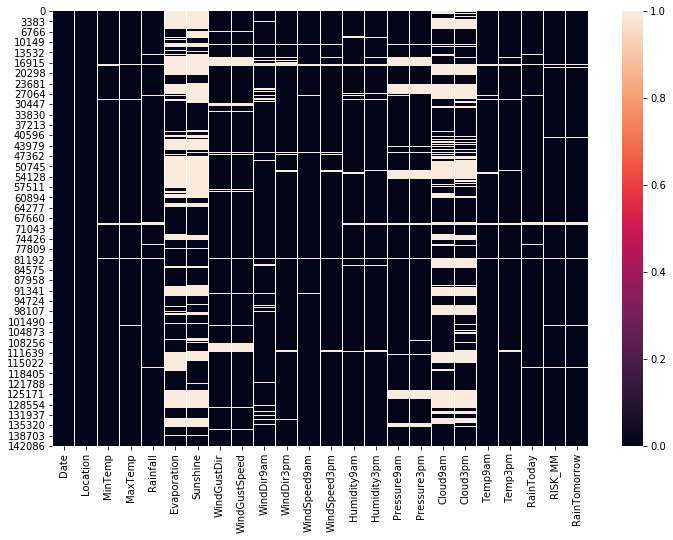

In [8]:
plt.figure(figsize=(12,8))
sns.heatmap(df.isnull())

In [9]:
df=df.dropna(how='any')

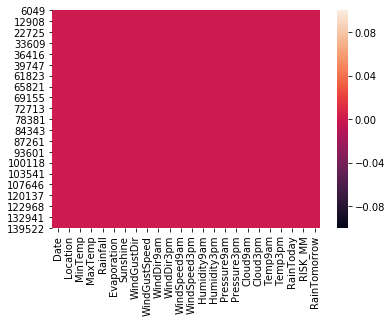

In [10]:
sns.heatmap(df.isnull())

In [11]:
df.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RISK_MM
count,56420.000000,56420.000000,56420.000000,56420.000000,56420.000000,56420.000000,56420.000000,56420.000000,56420.000000,56420.000000,56420.000000,56420.000000,56420.000000,56420.000000,56420.000000,56420.000000,56420.000000
mean,13.464770,24.219206,2.130397,5.503135,7.735626,40.877366,15.667228,19.786778,65.874123,49.601985,1017.239505,1014.795580,4.241705,4.326515,18.204961,22.710333,2.346960
std,6.416689,6.970676,7.014822,3.696282,3.758153,13.335232,8.317005,8.510180,18.513289,20.197040,6.909357,6.870892,2.797162,2.647251,6.567991,6.836543,8.731885
min,-6.700000,4.100000,0.000000,0.000000,0.000000,9.000000,2.000000,2.000000,0.000000,0.000000,980.500000,977.100000,0.000000,0.000000,-0.700000,3.700000,0.000000
25%,8.600000,18.700000,0.000000,2.800000,5.000000,31.000000,9.000000,13.000000,55.000000,35.000000,1012.700000,1010.100000,1.000000,2.000000,13.100000,17.400000,0.000000
50%,13.200000,23.900000,0.000000,5.000000,8.600000,39.000000,15.000000,19.000000,67.000000,50.000000,1017.200000,1014.700000,5.000000,5.000000,17.800000,22.400000,0.000000
75%,18.400000,29.700000,0.600000,7.400000,10.700000,48.000000,20.000000,26.000000,79.000000,63.000000,1021.800000,1019.400000,7.000000,7.000000,23.300000,27.900000,0.600000
max,31.400000,48.100000,206.200000,81.200000,14.500000,124.000000,67.000000,76.000000,100.000000,100.000000,1040.400000,1038.900000,8.000000,9.000000,39.400000,46.100000,367.600000


In [12]:
df.RainToday.replace({'No':0,'Yes':1},inplace=True)
df.RainTomorrow.replace({'No':0,'Yes':1},inplace=True)

In [13]:
df.sample(10)

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow
62907,2013-12-20,Sale,17.6,32.8,0.0,8.4,9.5,SSE,61.0,NNW,...,34.0,1010.6,1010.6,3.0,5.0,27.9,29.0,0,0.8,0
141651,2015-09-12,Darwin,19.3,34.5,0.0,10.2,11.1,N,50.0,ENE,...,23.0,1017.0,1012.3,1.0,1.0,27.0,33.6,0,0.0,0
22465,2012-10-08,NorfolkIsland,16.4,21.3,0.0,6.2,9.8,NNW,44.0,NNW,...,71.0,1014.5,1012.2,2.0,5.0,19.3,20.3,0,1.2,1
38713,2015-03-24,WaggaWagga,15.8,24.3,0.2,6.6,6.2,WSW,43.0,W,...,36.0,1012.4,1011.4,7.0,2.0,15.8,21.9,0,0.8,0
100658,2012-02-19,MountGambier,14.9,31.2,0.0,6.6,10.9,S,46.0,SSE,...,43.0,1014.8,1012.8,5.0,3.0,19.5,27.4,0,0.0,0
140710,2013-01-16,Darwin,25.8,33.2,4.0,0.8,10.8,WSW,41.0,WSW,...,64.0,1008.0,1004.2,7.0,8.0,30.2,32.4,1,0.0,0
141609,2015-08-01,Darwin,20.9,31.8,0.0,8.0,11.1,ENE,35.0,E,...,37.0,1016.1,1012.5,0.0,1.0,25.1,29.5,0,0.0,0
140017,2010-12-24,Darwin,24.0,30.7,18.4,4.6,2.9,E,39.0,SE,...,75.0,1004.8,1002.1,7.0,7.0,27.5,30.0,1,2.8,1
137991,2014-06-02,AliceSprings,3.3,21.1,0.0,4.0,10.3,SSE,28.0,ESE,...,26.0,1022.0,1019.0,3.0,2.0,12.1,20.6,0,0.0,0
104270,2013-12-12,Nuriootpa,10.9,21.8,0.0,5.8,9.5,WSW,46.0,WSW,...,44.0,1015.7,1014.3,8.0,5.0,15.5,21.3,0,0.0,0


In [14]:
df.skew()

MinTemp           0.052469
MaxTemp           0.185014
Rainfall          7.502521
Evaporation       2.232267
Sunshine         -0.551711
WindGustSpeed     0.960215
WindSpeed9am      0.933070
WindSpeed3pm      0.596814
Humidity9am      -0.489376
Humidity3pm       0.005988
Pressure9am      -0.064353
Pressure3pm      -0.000580
Cloud9am         -0.160677
Cloud3pm         -0.191081
Temp9am           0.111134
Temp3pm           0.195421
RainToday         1.345718
RISK_MM          10.003832
RainTomorrow      1.350070
dtype: float64

In [15]:
# Visualization

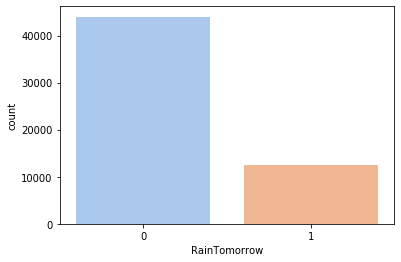

In [16]:
sns.countplot(df.RainTomorrow,palette='pastel')

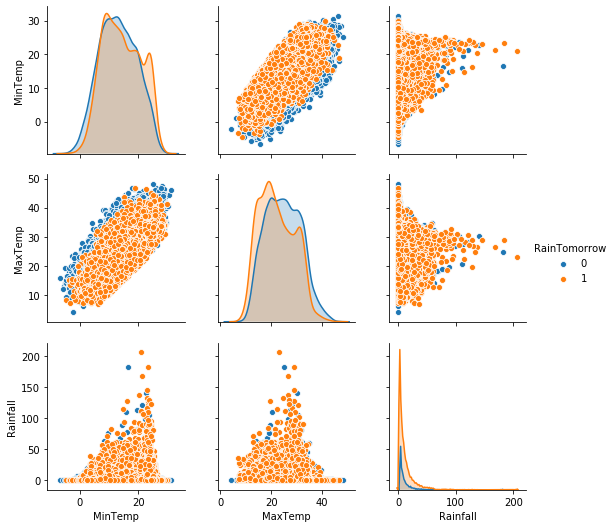

In [17]:
sns.pairplot(df,vars=['MinTemp','MaxTemp','Rainfall'],hue='RainTomorrow')

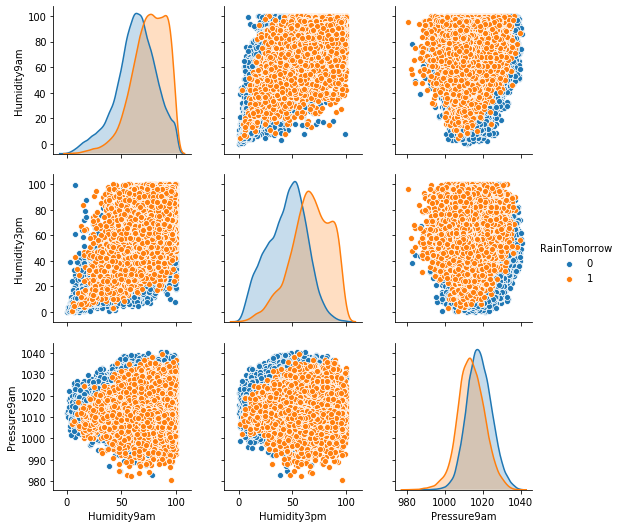

In [18]:
sns.pairplot(df,vars=['Humidity9am','Humidity3pm','Pressure9am'],hue='RainTomorrow')

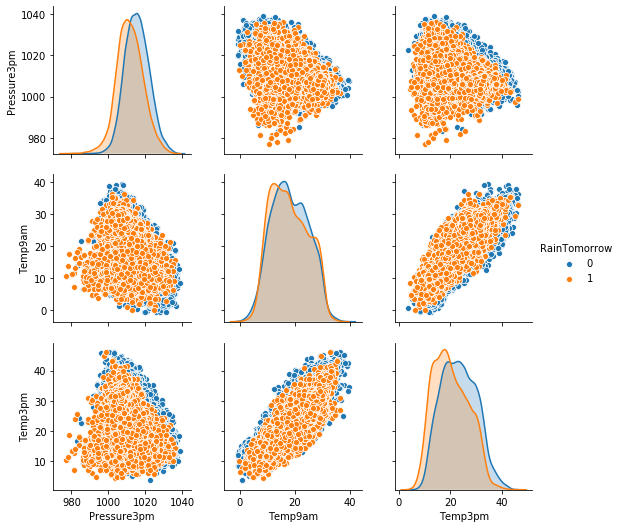

In [19]:
sns.pairplot(df,vars=['Pressure3pm','Temp9am','Temp3pm'],hue='RainTomorrow')

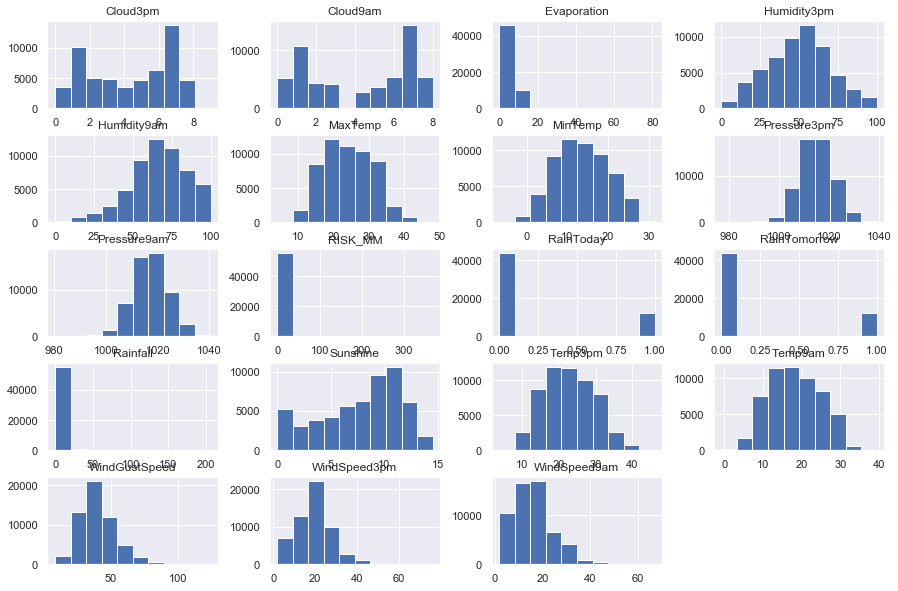

In [20]:
sns.set()
df.hist(figsize=(15,10))
plt.show()

In [21]:
df.corr()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow
MinTemp,1.000000,0.749687,0.110800,0.506764,0.076087,0.118054,0.108522,0.137273,-0.174991,0.070827,-0.475661,-0.495577,0.106177,0.042173,0.906295,0.727222,0.048953,0.142357,0.087428
MaxTemp,0.749687,1.000000,-0.069981,0.650964,0.463913,0.035531,-0.008171,0.012266,-0.495781,-0.448116,-0.350980,-0.451691,-0.263634,-0.257752,0.893387,0.984841,-0.221810,-0.016697,-0.147467
Rainfall,0.110800,-0.069981,1.000000,-0.077239,-0.246379,0.106308,0.050584,0.044112,0.263625,0.277625,-0.180606,-0.137302,0.217169,0.191433,0.013713,-0.074627,0.550515,0.304971,0.254342
Evaporation,0.506764,0.650964,-0.077239,1.000000,0.369250,0.209566,0.193154,0.124345,-0.554232,-0.422436,-0.297319,-0.325954,-0.199809,-0.202366,0.593122,0.630727,-0.218079,-0.044199,-0.130002
Sunshine,0.076087,0.463913,-0.246379,0.369250,1.000000,-0.052422,-0.013842,0.029200,-0.500343,-0.629299,0.043330,-0.020632,-0.677939,-0.702022,0.289038,0.486129,-0.328904,-0.299330,-0.453407
WindGustSpeed,0.118054,0.035531,0.106308,0.209566,-0.052422,1.000000,0.608852,0.685236,-0.193410,-0.042653,-0.430363,-0.383683,0.088129,0.131590,0.085520,-0.000382,0.146276,0.138410,0.233158
WindSpeed9am,0.108522,-0.008171,0.050584,0.193154,-0.013842,0.608852,1.000000,0.502226,-0.236795,-0.058449,-0.201518,-0.155484,0.034908,0.062507,0.053749,-0.018357,0.083125,0.038842,0.083904
WindSpeed3pm,0.137273,0.012266,0.044112,0.124345,0.029200,0.685236,0.502226,1.000000,-0.100626,0.031843,-0.293155,-0.252095,0.068224,0.041475,0.114043,-0.009436,0.085627,0.028658,0.088862
Humidity9am,-0.174991,-0.495781,0.263625,-0.554232,-0.500343,-0.193410,-0.236795,-0.100626,1.000000,0.685697,0.114575,0.172972,0.438962,0.348707,-0.423598,-0.487758,0.379451,0.181268,0.271033
Humidity3pm,0.070827,-0.448116,0.277625,-0.422436,-0.629299,-0.042653,-0.058449,0.031843,0.685697,1.000000,-0.063454,0.024109,0.509223,0.510996,-0.151614,-0.497245,0.385440,0.313669,0.455358


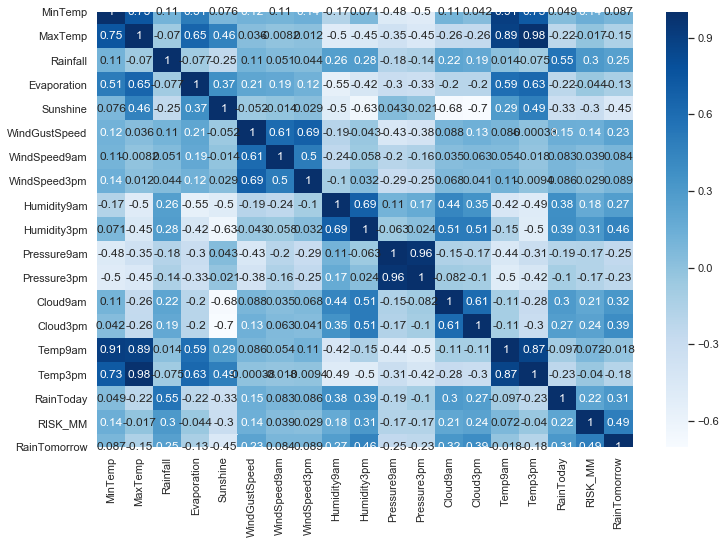

In [22]:
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(),annot=True,cmap='Blues')

In [23]:
# Model Building

In [24]:
df = df.drop(['Location','Date','Evaporation','Sunshine', 'Cloud9am','Cloud3pm','WindGustDir','WindGustSpeed','WindDir9am','WindDir3pm','WindSpeed9am','WindSpeed3pm'], axis=1)

In [25]:
df.sample(10)

,MinTemp,MaxTemp,Rainfall,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow
62907,17.6,32.8,0.0,56.0,34.0,1010.6,1010.6,27.9,29.0,0,0.8,0
35628,22.2,31.5,0.0,54.0,39.0,1020.5,1017.8,27.3,29.9,0,0.0,0
118041,20.9,33.8,0.0,61.0,43.0,1015.0,1012.4,23.9,30.7,0,0.0,0
84767,16.3,26.8,0.0,69.0,58.0,1019.1,1016.4,22.6,25.4,0,0.0,0
38827,4.2,11.8,6.8,78.0,67.0,1018.7,1015.5,7.9,11.4,1,0.0,0
140594,17.6,32.1,0.0,84.0,44.0,1014.8,1010.1,23.6,30.3,0,0.0,0
71512,15.6,38.4,0.0,31.0,15.0,1018.7,1016.3,25.1,37.4,0,0.0,0
138175,21.9,39.4,1.6,50.0,26.0,1008.5,1004.1,29.8,35.4,1,1.2,1
141904,24.9,33.5,1.8,76.0,56.0,1013.9,1010.5,27.4,31.9,1,0.0,0
106656,20.1,29.1,26.4,74.0,29.0,1003.4,1004.6,20.3,27.5,1,0.0,0


In [26]:
y=df.RainTomorrow
x=df.drop('RainTomorrow',axis=1)

In [27]:
x.shape,y.shape

((56420, 11), (56420,))

In [28]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.20,random_state=42)

In [29]:
sc=StandardScaler()
xtrain=sc.fit_transform(xtrain)
xtest=sc.fit_transform(xtest)

In [30]:
# ANN model building

In [31]:
def baseline_model():
    model=Sequential()
    model.add(Dense(128,init='uniform',activation='relu',input_dim=xtrain.shape[1]))
    model.add(Dense(64,init='uniform',activation='relu'))
    model.add(Dense(1,init='uniform',activation='sigmoid'))
    model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
    return model

In [32]:
estimator=KerasClassifier(build_fn=baseline_model,batch_size=10,epochs=500,verbose=1)
kfold=KFold(n_splits=10,shuffle=True,random_state=42)
scores=cross_val_score(estimator,X=xtrain,y=ytrain,cv=kfold)
mean=scores.mean()

Epoch 1/500
40622/40622 [==============================] - 14s 347us/step - loss: 0.0463 - accuracy: 0.9814
Epoch 2/500
40622/40622 [==============================] - 12s 289us/step - loss: 0.0150 - accuracy: 0.9944
Epoch 3/500
40622/40622 [==============================] - 12s 294us/step - loss: 0.0138 - accuracy: 0.9951
Epoch 4/500
40622/40622 [==============================] - 11s 275us/step - loss: 0.0117 - accuracy: 0.9953
Epoch 5/500
40622/40622 [==============================] - 12s 305us/step - loss: 0.0107 - accuracy: 0.9963s - loss: 0.0107 - accuracy: 
Epoch 6/500
40622/40622 [==============================] - 13s 313us/step - loss: 0.0104 - accuracy: 0.9965
Epoch 7/500
40622/40622 [==============================] - 12s 304us/step - loss: 0.0085 - accuracy: 0.9972
Epoch 8/500
40622/40622 [==============================] - 13s 308us/step - loss: 0.0077 - accuracy: 0.9975
Epoch 9/500
40622/40622 [==============================] - 15s 362us/step - loss: 0.0076 - accuracy: 0.9968

40622/40622 [==============================] - 10s 253us/step - loss: 3.8284e-07 - accuracy: 1.0000
Epoch 76/500
40622/40622 [==============================] - 10s 255us/step - loss: 0.0075 - accuracy: 0.9987
Epoch 77/500
40622/40622 [==============================] - 10s 248us/step - loss: 0.0017 - accuracy: 0.9997
Epoch 78/500
40622/40622 [==============================] - 10s 251us/step - loss: 0.0016 - accuracy: 0.9998
Epoch 79/500
40622/40622 [==============================] - 10s 242us/step - loss: 3.5536e-06 - accuracy: 1.0000
Epoch 80/500
40622/40622 [==============================] - 10s 246us/step - loss: 4.2554e-07 - accuracy: 1.0000
Epoch 81/500
40622/40622 [==============================] - 10s 249us/step - loss: 0.0045 - accuracy: 0.9994
Epoch 82/500
40622/40622 [==============================] - 10s 244us/step - loss: 9.7272e-04 - accuracy: 0.9997
Epoch 83/500
40622/40622 [==============================] - 10s 253us/step - loss: 5.7870e-06 - accuracy: 1.0000
Epoch 84/500

40622/40622 [==============================] - 10s 252us/step - loss: 0.0029 - accuracy: 0.9994
Epoch 149/500
40622/40622 [==============================] - 11s 276us/step - loss: 1.0086e-04 - accuracy: 1.0000
Epoch 150/500
40622/40622 [==============================] - 12s 296us/step - loss: 0.0020 - accuracy: 0.9996
Epoch 151/500
40622/40622 [==============================] - 14s 355us/step - loss: 1.0873e-05 - accuracy: 1.0000
Epoch 152/500
40622/40622 [==============================] - 14s 356us/step - loss: 1.2556e-06 - accuracy: 1.0000
Epoch 153/500
40622/40622 [==============================] - 12s 299us/step - loss: 0.0024 - accuracy: 0.9998
Epoch 154/500
40622/40622 [==============================] - 16s 391us/step - loss: 4.5788e-06 - accuracy: 1.0000
Epoch 155/500
40622/40622 [==============================] - 12s 297us/step - loss: 4.7852e-07 - accuracy: 1.0000
Epoch 156/500
40622/40622 [==============================] - 13s 308us/step - loss: 3.0307e-06 - accuracy: 1.0000


40622/40622 [==============================] - 10s 245us/step - loss: 4.7438e-08 - accuracy: 1.0000
Epoch 221/500
40622/40622 [==============================] - 10s 251us/step - loss: 0.0072 - accuracy: 0.9995
Epoch 222/500
40622/40622 [==============================] - 10s 250us/step - loss: 7.6465e-06 - accuracy: 1.0000
Epoch 223/500
40622/40622 [==============================] - 10s 246us/step - loss: 1.3363e-06 - accuracy: 1.0000
Epoch 224/500
40622/40622 [==============================] - 10s 248us/step - loss: 2.4837e-07 - accuracy: 1.0000
Epoch 225/500
40622/40622 [==============================] - 10s 247us/step - loss: 0.0034 - accuracy: 0.9996
Epoch 226/500
40622/40622 [==============================] - 10s 258us/step - loss: 1.2372e-05 - accuracy: 1.0000
Epoch 227/500
40622/40622 [==============================] - 10s 257us/step - loss: 9.7492e-07 - accuracy: 1.0000
Epoch 228/500
40622/40622 [==============================] - 10s 250us/step - loss: 2.6659e-07 - accuracy: 1.0

40622/40622 [==============================] - 11s 282us/step - loss: 4.3871e-08 - accuracy: 1.0000
Epoch 293/500
40622/40622 [==============================] - 12s 283us/step - loss: 0.0047 - accuracy: 0.9995
Epoch 294/500
40622/40622 [==============================] - 11s 275us/step - loss: 4.3947e-06 - accuracy: 1.0000
Epoch 295/500
40622/40622 [==============================] - 11s 276us/step - loss: 5.3973e-07 - accuracy: 1.0000
Epoch 296/500
40622/40622 [==============================] - 11s 278us/step - loss: 6.2967e-08 - accuracy: 1.0000
Epoch 297/500
40622/40622 [==============================] - 11s 271us/step - loss: 9.4311e-09 - accuracy: 1.0000
Epoch 298/500
40622/40622 [==============================] - 11s 278us/step - loss: 2.1956e-09 - accuracy: 1.0000
Epoch 299/500
40622/40622 [==============================] - 11s 276us/step - loss: 0.0078 - accuracy: 0.9996
Epoch 300/500
40622/40622 [==============================] - 11s 283us/step - loss: 1.5973e-05 - accuracy: 1.0

40622/40622 [==============================] - 12s 292us/step - loss: 1.0532e-08 - accuracy: 1.0000
Epoch 365/500
40622/40622 [==============================] - 12s 299us/step - loss: 2.5694e-09 - accuracy: 1.0000
Epoch 366/500
40622/40622 [==============================] - 16s 391us/step - loss: 5.1082e-10 - accuracy: 1.0000
Epoch 367/500
40622/40622 [==============================] - 10s 247us/step - loss: 0.0054 - accuracy: 0.9996
Epoch 368/500
40622/40622 [==============================] - 10s 251us/step - loss: 0.0022 - accuracy: 0.9996
Epoch 369/500
40622/40622 [==============================] - 10s 252us/step - loss: 1.9738e-05 - accuracy: 1.0000
Epoch 370/500
40622/40622 [==============================] - 11s 283us/step - loss: 2.4607e-06 - accuracy: 1.0000
Epoch 371/500
40622/40622 [==============================] - 13s 313us/step - loss: 1.9021e-07 - accuracy: 1.0000
Epoch 372/500
40622/40622 [==============================] - 11s 260us/step - loss: 4.4242e-08 - accuracy: 1.0

40622/40622 [==============================] - 11s 265us/step - loss: 1.2628e-08 - accuracy: 1.0000
Epoch 436/500
40622/40622 [==============================] - 11s 274us/step - loss: 4.2237e-09 - accuracy: 1.0000
Epoch 437/500
40622/40622 [==============================] - 11s 267us/step - loss: 0.0037 - accuracy: 0.9996
Epoch 438/500
40622/40622 [==============================] - 11s 278us/step - loss: 2.4552e-04 - accuracy: 1.0000
Epoch 439/500
40622/40622 [==============================] - 12s 293us/step - loss: 3.2993e-07 - accuracy: 1.0000
Epoch 440/500
40622/40622 [==============================] - 11s 281us/step - loss: 1.0968e-07 - accuracy: 1.0000
Epoch 441/500
40622/40622 [==============================] - 11s 270us/step - loss: 4.0999e-08 - accuracy: 1.0000
Epoch 442/500
40622/40622 [==============================] - 11s 266us/step - loss: 1.0168e-08 - accuracy: 1.0000
Epoch 443/500
40622/40622 [==============================] - 11s 274us/step - loss: 0.0043 - accuracy: 0.9

40622/40622 [==============================] - 11s 265us/step - loss: 0.0092 - accuracy: 0.9963
Epoch 8/500
40622/40622 [==============================] - 11s 264us/step - loss: 0.0079 - accuracy: 0.9972
Epoch 9/500
40622/40622 [==============================] - 11s 268us/step - loss: 0.0079 - accuracy: 0.9973
Epoch 10/500
40622/40622 [==============================] - 11s 265us/step - loss: 0.0062 - accuracy: 0.9979
Epoch 11/500
40622/40622 [==============================] - 11s 263us/step - loss: 0.0078 - accuracy: 0.9972
Epoch 12/500
40622/40622 [==============================] - 11s 277us/step - loss: 0.0062 - accuracy: 0.9980
Epoch 13/500
40622/40622 [==============================] - 11s 267us/step - loss: 0.0063 - accuracy: 0.9980
Epoch 14/500
40622/40622 [==============================] - 10s 257us/step - loss: 0.0056 - accuracy: 0.9981
Epoch 15/500
40622/40622 [==============================] - 10s 257us/step - loss: 0.0055 - accuracy: 0.9983
Epoch 16/500
40622/40622 [========

40622/40622 [==============================] - 11s 276us/step - loss: 0.0025 - accuracy: 0.9997
Epoch 82/500
40622/40622 [==============================] - 12s 283us/step - loss: 1.4978e-05 - accuracy: 1.0000
Epoch 83/500
40622/40622 [==============================] - 11s 283us/step - loss: 1.4086e-06 - accuracy: 1.0000
Epoch 84/500
40622/40622 [==============================] - 12s 304us/step - loss: 0.0051 - accuracy: 0.9994
Epoch 85/500
40622/40622 [==============================] - 12s 295us/step - loss: 9.5327e-04 - accuracy: 0.9998
Epoch 86/500
40622/40622 [==============================] - 11s 270us/step - loss: 0.0045 - accuracy: 0.9993
Epoch 87/500
40622/40622 [==============================] - 11s 279us/step - loss: 0.0019 - accuracy: 0.9996
Epoch 88/500
40622/40622 [==============================] - 11s 267us/step - loss: 1.1370e-05 - accuracy: 1.0000
Epoch 89/500
40622/40622 [==============================] - 11s 277us/step - loss: 1.3645e-06 - accuracy: 1.0000s
Epoch 90/50

40622/40622 [==============================] - 11s 271us/step - loss: 1.5275e-06 - accuracy: 1.0000
Epoch 155/500
40622/40622 [==============================] - 11s 278us/step - loss: 1.4802e-07 - accuracy: 1.0000
Epoch 156/500
40622/40622 [==============================] - 11s 272us/step - loss: 0.0043 - accuracy: 0.9994
Epoch 157/500
40622/40622 [==============================] - 11s 268us/step - loss: 5.9031e-05 - accuracy: 1.0000
Epoch 158/500
40622/40622 [==============================] - 11s 269us/step - loss: 3.6548e-06 - accuracy: 1.0000
Epoch 159/500
40622/40622 [==============================] - ETA: 0s - loss: 6.3017e-07 - accuracy: 1.00 - 11s 271us/step - loss: 6.2970e-07 - accuracy: 1.0000
Epoch 160/500
40622/40622 [==============================] - 11s 269us/step - loss: 0.0045 - accuracy: 0.9991
Epoch 161/500
40622/40622 [==============================] - 11s 269us/step - loss: 1.5874e-05 - accuracy: 1.0000
Epoch 162/500
40622/40622 [==============================] - 11s

40622/40622 [==============================] - 10s 248us/step - loss: 7.5317e-08 - accuracy: 1.0000
Epoch 227/500
40622/40622 [==============================] - 10s 250us/step - loss: 1.1990e-08 - accuracy: 1.0000
Epoch 228/500
40622/40622 [==============================] - 11s 262us/step - loss: 1.9628e-09 - accuracy: 1.0000
Epoch 229/500
40622/40622 [==============================] - 10s 252us/step - loss: 5.6748e-10 - accuracy: 1.0000
Epoch 230/500
40622/40622 [==============================] - 10s 254us/step - loss: 0.0055 - accuracy: 0.9997
Epoch 231/500
40622/40622 [==============================] - 11s 259us/step - loss: 1.0182e-05 - accuracy: 1.0000
Epoch 232/500
40622/40622 [==============================] - 10s 253us/step - loss: 7.9648e-07 - accuracy: 1.0000
Epoch 233/500
40622/40622 [==============================] - 11s 262us/step - loss: 8.8125e-08 - accuracy: 1.0000
Epoch 234/500
40622/40622 [==============================] - 10s 256us/step - loss: 1.5035e-08 - accuracy:

40622/40622 [==============================] - 10s 251us/step - loss: 0.0015 - accuracy: 0.9996
Epoch 299/500
40622/40622 [==============================] - 10s 258us/step - loss: 1.6848e-05 - accuracy: 1.0000
Epoch 300/500
40622/40622 [==============================] - 10s 253us/step - loss: 8.7354e-07 - accuracy: 1.0000
Epoch 301/500
40622/40622 [==============================] - 10s 255us/step - loss: 1.1829e-07 - accuracy: 1.0000
Epoch 302/500
40622/40622 [==============================] - 10s 253us/step - loss: 1.4080e-08 - accuracy: 1.0000
Epoch 303/500
40622/40622 [==============================] - 10s 258us/step - loss: 0.0050 - accuracy: 0.9997s - loss: 0.0050 - accuracy: 0.99
Epoch 304/500
40622/40622 [==============================] - 10s 249us/step - loss: 2.7896e-06 - accuracy: 1.0000
Epoch 305/500
40622/40622 [==============================] - 11s 264us/step - loss: 0.0029 - accuracy: 0.9994
Epoch 306/500
40622/40622 [==============================] - 10s 254us/step - los

40622/40622 [==============================] - 13s 312us/step - loss: 8.1355e-09 - accuracy: 1.0000
Epoch 371/500
40622/40622 [==============================] - 13s 311us/step - loss: 0.0051 - accuracy: 0.9997s - loss: 0.005
Epoch 372/500
40622/40622 [==============================] - 12s 304us/step - loss: 0.0029 - accuracy: 0.9997
Epoch 373/500
40622/40622 [==============================] - 12s 300us/step - loss: 2.1526e-04 - accuracy: 1.0000
Epoch 374/500
40622/40622 [==============================] - 13s 317us/step - loss: 0.0015 - accuracy: 0.9998
Epoch 375/500
40622/40622 [==============================] - 13s 311us/step - loss: 7.4304e-04 - accuracy: 1.0000
Epoch 376/500
40622/40622 [==============================] - 13s 309us/step - loss: 1.1062e-06 - accuracy: 1.0000
Epoch 377/500
40622/40622 [==============================] - 13s 310us/step - loss: 2.4537e-07 - accuracy: 1.0000
Epoch 378/500
40622/40622 [==============================] - 13s 310us/step - loss: 5.0544e-08 - ac

Epoch 442/500
40622/40622 [==============================] - 10s 254us/step - loss: 3.9067e-06 - accuracy: 1.0000
Epoch 443/500
40622/40622 [==============================] - 10s 254us/step - loss: 0.0031 - accuracy: 0.9995
Epoch 444/500
40622/40622 [==============================] - 11s 260us/step - loss: 7.0297e-06 - accuracy: 1.0000
Epoch 445/500
40622/40622 [==============================] - 10s 252us/step - loss: 0.0034 - accuracy: 0.9996
Epoch 446/500
40622/40622 [==============================] - 11s 262us/step - loss: 6.0797e-04 - accuracy: 0.9999
Epoch 447/500
40622/40622 [==============================] - 11s 262us/step - loss: 3.9471e-06 - accuracy: 1.0000
Epoch 448/500
40622/40622 [==============================] - 11s 263us/step - loss: 4.4117e-07 - accuracy: 1.0000
Epoch 449/500
40622/40622 [==============================] - 10s 253us/step - loss: 7.3455e-08 - accuracy: 1.0000
Epoch 450/500
40622/40622 [==============================] - 11s 259us/step - loss: 0.0059 - acc

40622/40622 [==============================] - 10s 248us/step - loss: 0.0050 - accuracy: 0.9985
Epoch 15/500
40622/40622 [==============================] - 10s 254us/step - loss: 0.0064 - accuracy: 0.9981
Epoch 16/500
40622/40622 [==============================] - 10s 255us/step - loss: 0.0058 - accuracy: 0.9982
Epoch 17/500
40622/40622 [==============================] - 10s 255us/step - loss: 0.0044 - accuracy: 0.9987
Epoch 18/500
40622/40622 [==============================] - 11s 261us/step - loss: 0.0052 - accuracy: 0.9986
Epoch 19/500
40622/40622 [==============================] - 10s 256us/step - loss: 0.0044 - accuracy: 0.9987
Epoch 20/500
40622/40622 [==============================] - 10s 251us/step - loss: 0.0026 - accuracy: 0.9993
Epoch 21/500
40622/40622 [==============================] - 10s 253us/step - loss: 0.0029 - accuracy: 0.9993
Epoch 22/500
40622/40622 [==============================] - 10s 254us/step - loss: 0.0041 - accuracy: 0.9988
Epoch 23/500
40622/40622 [======

40622/40622 [==============================] - 10s 253us/step - loss: 8.8359e-07 - accuracy: 1.0000
Epoch 89/500
40622/40622 [==============================] - 11s 265us/step - loss: 1.0629e-07 - accuracy: 1.0000
Epoch 90/500
40622/40622 [==============================] - 10s 255us/step - loss: 0.0044 - accuracy: 0.9994
Epoch 91/500
40622/40622 [==============================] - 10s 252us/step - loss: 4.4890e-06 - accuracy: 1.0000
Epoch 92/500
40622/40622 [==============================] - 10s 257us/step - loss: 6.5788e-07 - accuracy: 1.0000
Epoch 93/500
40622/40622 [==============================] - 11s 267us/step - loss: 0.0050 - accuracy: 0.9996
Epoch 94/500
40622/40622 [==============================] - 10s 258us/step - loss: 1.6209e-05 - accuracy: 1.0000
Epoch 95/500
40622/40622 [==============================] - 11s 260us/step - loss: 1.8058e-06 - accuracy: 1.0000
Epoch 96/500
40622/40622 [==============================] - 10s 253us/step - loss: 0.0027 - accuracy: 0.9996
Epoch 97

40622/40622 [==============================] - 14s 357us/step - loss: 0.0036 - accuracy: 0.9995s - loss:
Epoch 161/500
40622/40622 [==============================] - 11s 267us/step - loss: 0.0015 - accuracy: 0.9997
Epoch 162/500
40622/40622 [==============================] - 11s 261us/step - loss: 0.0026 - accuracy: 0.9996
Epoch 163/500
40622/40622 [==============================] - 11s 261us/step - loss: 0.0018 - accuracy: 0.9997
Epoch 164/500
40622/40622 [==============================] - 11s 263us/step - loss: 7.1479e-04 - accuracy: 0.9998
Epoch 165/500
40622/40622 [==============================] - 11s 265us/step - loss: 2.2820e-06 - accuracy: 1.0000
Epoch 166/500
40622/40622 [==============================] - 10s 251us/step - loss: 3.0132e-07 - accuracy: 1.0000
Epoch 167/500
40622/40622 [==============================] - 11s 261us/step - loss: 4.1865e-08 - accuracy: 1.0000
Epoch 168/500
40622/40622 [==============================] - 10s 252us/step - loss: 0.0056 - accuracy: 0.9995

40622/40622 [==============================] - 11s 280us/step - loss: 0.0043 - accuracy: 0.9994
Epoch 233/500
40622/40622 [==============================] - 13s 329us/step - loss: 2.6950e-05 - accuracy: 1.0000
Epoch 234/500
40622/40622 [==============================] - 10s 255us/step - loss: 1.8957e-06 - accuracy: 1.0000s - loss: 1.9510e-06 
Epoch 235/500
40622/40622 [==============================] - 10s 253us/step - loss: 3.6750e-07 - accuracy: 1.0000
Epoch 236/500
40622/40622 [==============================] - 10s 256us/step - loss: 4.3332e-08 - accuracy: 1.0000
Epoch 237/500
40622/40622 [==============================] - 10s 258us/step - loss: 0.0038 - accuracy: 0.9995
Epoch 238/500
40622/40622 [==============================] - 11s 265us/step - loss: 0.0011 - accuracy: 0.9998
Epoch 239/500
40622/40622 [==============================] - 10s 251us/step - loss: 2.9517e-06 - accuracy: 1.0000s - loss: 3.1730e-06 - accuracy: 1.00 -
Epoch 240/500
40622/40622 [===========================

40622/40622 [==============================] - 11s 277us/step - loss: 0.0039 - accuracy: 0.9995
Epoch 304/500
40622/40622 [==============================] - 11s 280us/step - loss: 6.0144e-07 - accuracy: 1.0000
Epoch 305/500
40622/40622 [==============================] - 11s 281us/step - loss: 2.4703e-07 - accuracy: 1.0000
Epoch 306/500
40622/40622 [==============================] - 11s 271us/step - loss: 9.0515e-08 - accuracy: 1.0000
Epoch 307/500
40622/40622 [==============================] - 11s 272us/step - loss: 2.6243e-08 - accuracy: 1.0000
Epoch 308/500
40622/40622 [==============================] - 10s 258us/step - loss: 7.4613e-09 - accuracy: 1.0000
Epoch 309/500
40622/40622 [==============================] - 10s 258us/step - loss: 0.0044 - accuracy: 0.9996
Epoch 310/500
40622/40622 [==============================] - 11s 261us/step - loss: 2.5855e-06 - accuracy: 1.0000
Epoch 311/500
40622/40622 [==============================] - 12s 286us/step - loss: 5.2015e-07 - accuracy: 1.0

40622/40622 [==============================] - 11s 267us/step - loss: 7.8164e-09 - accuracy: 1.0000
Epoch 376/500
40622/40622 [==============================] - 10s 254us/step - loss: 2.0780e-09 - accuracy: 1.0000
Epoch 377/500
40622/40622 [==============================] - 11s 266us/step - loss: 6.6174e-10 - accuracy: 1.0000
Epoch 378/500
40622/40622 [==============================] - 11s 259us/step - loss: 0.0059 - accuracy: 0.9995
Epoch 379/500
40622/40622 [==============================] - 11s 267us/step - loss: 5.9677e-07 - accuracy: 1.0000
Epoch 380/500
40622/40622 [==============================] - 11s 263us/step - loss: 2.4213e-07 - accuracy: 1.0000
Epoch 381/500
40622/40622 [==============================] - 11s 264us/step - loss: 4.3512e-08 - accuracy: 1.0000
Epoch 382/500
40622/40622 [==============================] - 11s 261us/step - loss: 1.3365e-08 - accuracy: 1.0000
Epoch 383/500
40622/40622 [==============================] - 11s 260us/step - loss: 4.1719e-09 - accuracy:

40622/40622 [==============================] - 11s 261us/step - loss: 2.3651e-08 - accuracy: 1.0000
Epoch 448/500
40622/40622 [==============================] - 11s 268us/step - loss: 4.9444e-09 - accuracy: 1.0000
Epoch 449/500
40622/40622 [==============================] - 11s 262us/step - loss: 0.0026 - accuracy: 0.9997
Epoch 450/500
40622/40622 [==============================] - 11s 259us/step - loss: 0.0012 - accuracy: 0.9999
Epoch 451/500
40622/40622 [==============================] - 11s 273us/step - loss: 1.2910e-06 - accuracy: 1.0000
Epoch 452/500
40622/40622 [==============================] - 11s 272us/step - loss: 1.3400e-07 - accuracy: 1.0000
Epoch 453/500
40622/40622 [==============================] - 11s 271us/step - loss: 4.2613e-08 - accuracy: 1.0000
Epoch 454/500
40622/40622 [==============================] - 11s 268us/step - loss: 0.0030 - accuracy: 0.9997
Epoch 455/500
40622/40622 [==============================] - 11s 263us/step - loss: 1.0385e-05 - accuracy: 1.0000


40622/40622 [==============================] - 11s 275us/step - loss: 0.0035 - accuracy: 0.9990
Epoch 20/500
40622/40622 [==============================] - 10s 253us/step - loss: 0.0043 - accuracy: 0.9988
Epoch 21/500
40622/40622 [==============================] - 11s 265us/step - loss: 0.0050 - accuracy: 0.9989
Epoch 22/500
40622/40622 [==============================] - 11s 278us/step - loss: 0.0035 - accuracy: 0.9992
Epoch 23/500
40622/40622 [==============================] - 11s 264us/step - loss: 0.0017 - accuracy: 0.9997
Epoch 24/500
40622/40622 [==============================] - 11s 271us/step - loss: 0.0041 - accuracy: 0.9988
Epoch 25/500
40622/40622 [==============================] - 11s 273us/step - loss: 0.0040 - accuracy: 0.9989
Epoch 26/500
40622/40622 [==============================] - 10s 257us/step - loss: 0.0029 - accuracy: 0.9992
Epoch 27/500
40622/40622 [==============================] - 11s 259us/step - loss: 0.0028 - accuracy: 0.9994
Epoch 28/500
40622/40622 [======

40622/40622 [==============================] - 11s 270us/step - loss: 0.0047 - accuracy: 0.9995
Epoch 94/500
40622/40622 [==============================] - 10s 257us/step - loss: 8.9665e-04 - accuracy: 0.9998
Epoch 95/500
40622/40622 [==============================] - 11s 266us/step - loss: 7.0796e-06 - accuracy: 1.0000
Epoch 96/500
40622/40622 [==============================] - 10s 258us/step - loss: 9.8844e-07 - accuracy: 1.0000
Epoch 97/500
40622/40622 [==============================] - 11s 261us/step - loss: 1.6594e-07 - accuracy: 1.0000
Epoch 98/500
40622/40622 [==============================] - 11s 271us/step - loss: 3.4188e-08 - accuracy: 1.0000
Epoch 99/500
40622/40622 [==============================] - 11s 268us/step - loss: 0.0052 - accuracy: 0.9994
Epoch 100/500
40622/40622 [==============================] - 10s 258us/step - loss: 2.6474e-06 - accuracy: 1.0000
Epoch 101/500
40622/40622 [==============================] - 11s 262us/step - loss: 3.1733e-07 - accuracy: 1.0000
Ep

40622/40622 [==============================] - 11s 281us/step - loss: 0.0015 - accuracy: 0.9996
Epoch 166/500
40622/40622 [==============================] - 11s 274us/step - loss: 8.8550e-06 - accuracy: 1.0000
Epoch 167/500
40622/40622 [==============================] - 11s 274us/step - loss: 1.1607e-06 - accuracy: 1.0000
Epoch 168/500
40622/40622 [==============================] - 11s 270us/step - loss: 0.0023 - accuracy: 0.9998
Epoch 169/500
40622/40622 [==============================] - 11s 280us/step - loss: 1.9429e-06 - accuracy: 1.0000
Epoch 170/500
40622/40622 [==============================] - 11s 266us/step - loss: 2.5500e-07 - accuracy: 1.0000
Epoch 171/500
40622/40622 [==============================] - 11s 265us/step - loss: 4.0750e-08 - accuracy: 1.0000
Epoch 172/500
40622/40622 [==============================] - 10s 256us/step - loss: 7.9382e-09 - accuracy: 1.0000
Epoch 173/500
40622/40622 [==============================] - 11s 271us/step - loss: 0.0050 - accuracy: 0.9995


40622/40622 [==============================] - 11s 275us/step - loss: 5.9881e-08 - accuracy: 1.0000
Epoch 238/500
40622/40622 [==============================] - 11s 278us/step - loss: 0.0028 - accuracy: 0.9996
Epoch 239/500
40622/40622 [==============================] - 11s 266us/step - loss: 2.8773e-06 - accuracy: 1.0000
Epoch 240/500
40622/40622 [==============================] - 11s 263us/step - loss: 4.1426e-07 - accuracy: 1.0000
Epoch 241/500
40622/40622 [==============================] - 11s 266us/step - loss: 0.0031 - accuracy: 0.9996
Epoch 242/500
40622/40622 [==============================] - 11s 262us/step - loss: 2.6714e-04 - accuracy: 0.9999
Epoch 243/500
40622/40622 [==============================] - 11s 279us/step - loss: 0.0024 - accuracy: 0.9995
Epoch 244/500
40622/40622 [==============================] - 11s 265us/step - loss: 0.0014 - accuracy: 0.9996
Epoch 245/500
40622/40622 [==============================] - 11s 263us/step - loss: 8.0209e-06 - accuracy: 1.0000
Epoc

40622/40622 [==============================] - 11s 265us/step - loss: 0.0026 - accuracy: 0.9998
Epoch 310/500
40622/40622 [==============================] - 10s 253us/step - loss: 2.1526e-06 - accuracy: 1.0000
Epoch 311/500
40622/40622 [==============================] - 11s 272us/step - loss: 2.7534e-07 - accuracy: 1.0000
Epoch 312/500
40622/40622 [==============================] - 11s 261us/step - loss: 1.0706e-07 - accuracy: 1.0000
Epoch 313/500
40622/40622 [==============================] - 11s 261us/step - loss: 2.9975e-08 - accuracy: 1.0000
Epoch 314/500
40622/40622 [==============================] - 10s 258us/step - loss: 0.0033 - accuracy: 0.9996
Epoch 315/500
40622/40622 [==============================] - 11s 263us/step - loss: 1.2051e-06 - accuracy: 1.0000
Epoch 316/500
40622/40622 [==============================] - 11s 260us/step - loss: 3.5339e-07 - accuracy: 1.0000
Epoch 317/500
40622/40622 [==============================] - 11s 268us/step - loss: 1.1389e-07 - accuracy: 1.0

40622/40622 [==============================] - 11s 260us/step - loss: 2.1920e-07 - accuracy: 1.0000
Epoch 382/500
40622/40622 [==============================] - 11s 278us/step - loss: 2.8194e-08 - accuracy: 1.0000
Epoch 383/500
40622/40622 [==============================] - 10s 258us/step - loss: 0.0036 - accuracy: 0.9995
Epoch 384/500
40622/40622 [==============================] - 11s 268us/step - loss: 8.3784e-06 - accuracy: 1.0000
Epoch 385/500
40622/40622 [==============================] - 11s 267us/step - loss: 1.0457e-06 - accuracy: 1.0000
Epoch 386/500
40622/40622 [==============================] - 11s 259us/step - loss: 1.4905e-07 - accuracy: 1.0000
Epoch 387/500
40622/40622 [==============================] - 11s 260us/step - loss: 0.0026 - accuracy: 0.9997
Epoch 388/500
40622/40622 [==============================] - 11s 268us/step - loss: 0.0020 - accuracy: 0.9996
Epoch 389/500
40622/40622 [==============================] - 11s 269us/step - loss: 4.5235e-04 - accuracy: 0.9999


40622/40622 [==============================] - 11s 270us/step - loss: 0.0032 - accuracy: 0.9996
Epoch 454/500
40622/40622 [==============================] - 11s 267us/step - loss: 1.9794e-06 - accuracy: 1.0000
Epoch 455/500
40622/40622 [==============================] - 11s 279us/step - loss: 6.1304e-07 - accuracy: 1.0000
Epoch 456/500
40622/40622 [==============================] - 11s 268us/step - loss: 1.3911e-07 - accuracy: 1.0000
Epoch 457/500
40622/40622 [==============================] - 11s 270us/step - loss: 2.8903e-08 - accuracy: 1.0000
Epoch 458/500
40622/40622 [==============================] - 11s 269us/step - loss: 5.3197e-09 - accuracy: 1.0000
Epoch 459/500
40622/40622 [==============================] - 11s 266us/step - loss: 1.1014e-09 - accuracy: 1.0000
Epoch 460/500
40622/40622 [==============================] - 11s 268us/step - loss: 0.0056 - accuracy: 0.9995
Epoch 461/500
40622/40622 [==============================] - 11s 264us/step - loss: 8.9579e-07 - accuracy: 1.0

40622/40622 [==============================] - 11s 260us/step - loss: 5.4730e-05 - accuracy: 1.0000
Epoch 27/500
40622/40622 [==============================] - 11s 259us/step - loss: 0.0030 - accuracy: 0.9992
Epoch 28/500
40622/40622 [==============================] - 10s 254us/step - loss: 0.0028 - accuracy: 0.9995
Epoch 29/500
40622/40622 [==============================] - 10s 254us/step - loss: 4.1462e-05 - accuracy: 1.0000
Epoch 30/500
40622/40622 [==============================] - 10s 257us/step - loss: 0.0051 - accuracy: 0.9989
Epoch 31/500
40622/40622 [==============================] - 11s 261us/step - loss: 0.0036 - accuracy: 0.9988
Epoch 32/500
40622/40622 [==============================] - 10s 254us/step - loss: 0.0018 - accuracy: 0.9997
Epoch 33/500
40622/40622 [==============================] - 10s 253us/step - loss: 0.0033 - accuracy: 0.9990
Epoch 34/500
40622/40622 [==============================] - 11s 262us/step - loss: 1.3538e-04 - accuracy: 1.0000
Epoch 35/500
40622/4

40622/40622 [==============================] - 11s 263us/step - loss: 9.6592e-07 - accuracy: 1.0000
Epoch 100/500
40622/40622 [==============================] - 11s 264us/step - loss: 0.0049 - accuracy: 0.9995
Epoch 101/500
40622/40622 [==============================] - 10s 251us/step - loss: 9.6244e-06 - accuracy: 1.0000
Epoch 102/500
40622/40622 [==============================] - 10s 250us/step - loss: 1.4887e-06 - accuracy: 1.0000
Epoch 103/500
40622/40622 [==============================] - 11s 272us/step - loss: 3.2300e-07 - accuracy: 1.0000
Epoch 104/500
40622/40622 [==============================] - 11s 260us/step - loss: 0.0064 - accuracy: 0.9995
Epoch 105/500
40622/40622 [==============================] - 11s 266us/step - loss: 0.0022 - accuracy: 0.9996s - loss: 0.0023 - ac
Epoch 106/500
40622/40622 [==============================] - 11s 271us/step - loss: 0.0024 - accuracy: 0.9993
Epoch 107/500
40622/40622 [==============================] - 11s 280us/step - loss: 3.8522e-05 - 

40622/40622 [==============================] - 11s 282us/step - loss: 8.3401e-07 - accuracy: 1.0000
Epoch 172/500
40622/40622 [==============================] - 11s 261us/step - loss: 1.2012e-07 - accuracy: 1.0000
Epoch 173/500
40622/40622 [==============================] - 11s 268us/step - loss: 1.9167e-08 - accuracy: 1.0000s - loss: 1.9352e-08 - accuracy
Epoch 174/500
40622/40622 [==============================] - 11s 268us/step - loss: 2.6792e-09 - accuracy: 1.0000
Epoch 175/500
40622/40622 [==============================] - 11s 270us/step - loss: 8.1746e-10 - accuracy: 1.0000s - loss: 8.2985e-10 - ac
Epoch 176/500
40622/40622 [==============================] - 11s 269us/step - loss: 0.0074 - accuracy: 0.9996
Epoch 177/500
40622/40622 [==============================] - 11s 270us/step - loss: 2.7887e-06 - accuracy: 1.0000
Epoch 178/500
40622/40622 [==============================] - 11s 263us/step - loss: 4.6827e-07 - accuracy: 1.0000
Epoch 179/500
40622/40622 [=======================

40622/40622 [==============================] - 13s 310us/step - loss: 0.0033 - accuracy: 0.9994
Epoch 244/500
40622/40622 [==============================] - 12s 298us/step - loss: 8.3029e-06 - accuracy: 1.0000
Epoch 245/500
40622/40622 [==============================] - 12s 306us/step - loss: 1.1066e-06 - accuracy: 1.0000
Epoch 246/500
40622/40622 [==============================] - 12s 292us/step - loss: 2.7182e-07 - accuracy: 1.0000
Epoch 247/500
40622/40622 [==============================] - 13s 316us/step - loss: 4.0224e-08 - accuracy: 1.0000
Epoch 248/500
40622/40622 [==============================] - 12s 302us/step - loss: 0.0054 - accuracy: 0.9993
Epoch 249/500
40622/40622 [==============================] - 12s 297us/step - loss: 7.6328e-04 - accuracy: 0.9998
Epoch 250/500
40622/40622 [==============================] - 12s 298us/step - loss: 1.9667e-06 - accuracy: 1.0000
Epoch 251/500
40622/40622 [==============================] - 12s 285us/step - loss: 8.3519e-07 - accuracy: 1.0

40622/40622 [==============================] - 12s 298us/step - loss: 0.0038 - accuracy: 0.9996
Epoch 316/500
40622/40622 [==============================] - 12s 292us/step - loss: 0.0029 - accuracy: 0.9995
Epoch 317/500
40622/40622 [==============================] - 13s 311us/step - loss: 1.9836e-04 - accuracy: 1.0000
Epoch 318/500
40622/40622 [==============================] - 12s 291us/step - loss: 0.0031 - accuracy: 0.9996
Epoch 319/500
40622/40622 [==============================] - 12s 292us/step - loss: 3.0021e-05 - accuracy: 1.0000
Epoch 320/500
40622/40622 [==============================] - 12s 286us/step - loss: 0.0015 - accuracy: 0.9998
Epoch 321/500
40622/40622 [==============================] - 13s 312us/step - loss: 4.8863e-06 - accuracy: 1.0000
Epoch 322/500
40622/40622 [==============================] - 12s 284us/step - loss: 6.0545e-07 - accuracy: 1.0000
Epoch 323/500
40622/40622 [==============================] - 13s 317us/step - loss: 9.3565e-08 - accuracy: 1.0000
Epoc

40622/40622 [==============================] - 12s 304us/step - loss: 0.0031 - accuracy: 0.9996
Epoch 388/500
40622/40622 [==============================] - 12s 304us/step - loss: 4.8580e-06 - accuracy: 1.0000s - loss: 4.9
Epoch 389/500
40622/40622 [==============================] - 12s 290us/step - loss: 1.1759e-06 - accuracy: 1.0000
Epoch 390/500
40622/40622 [==============================] - 12s 303us/step - loss: 7.6224e-08 - accuracy: 1.0000
Epoch 391/500
40622/40622 [==============================] - 12s 299us/step - loss: 0.0026 - accuracy: 0.9996
Epoch 392/500
40622/40622 [==============================] - 12s 296us/step - loss: 3.4570e-04 - accuracy: 0.9999
Epoch 393/500
40622/40622 [==============================] - 12s 304us/step - loss: 3.9662e-07 - accuracy: 1.0000
Epoch 394/500
40622/40622 [==============================] - 12s 300us/step - loss: 1.1802e-07 - accuracy: 1.0000
Epoch 395/500
40622/40622 [==============================] - 13s 315us/step - loss: 5.0685e-08 - 

40622/40622 [==============================] - 12s 305us/step - loss: 1.8375e-06 - accuracy: 1.0000
Epoch 460/500
40622/40622 [==============================] - ETA: 0s - loss: 2.9463e-07 - accuracy: 1.00 - 12s 285us/step - loss: 2.9447e-07 - accuracy: 1.0000
Epoch 461/500
40622/40622 [==============================] - 11s 281us/step - loss: 0.0023 - accuracy: 0.9997
Epoch 462/500
40622/40622 [==============================] - 12s 293us/step - loss: 2.7082e-06 - accuracy: 1.0000
Epoch 463/500
40622/40622 [==============================] - 12s 296us/step - loss: 6.5684e-07 - accuracy: 1.0000
Epoch 464/500
40622/40622 [==============================] - 12s 288us/step - loss: 1.1313e-07 - accuracy: 1.0000
Epoch 465/500
40622/40622 [==============================] - 12s 301us/step - loss: 2.0991e-08 - accuracy: 1.0000
Epoch 466/500
40622/40622 [==============================] - 12s 297us/step - loss: 4.2833e-09 - accuracy: 1.0000
Epoch 467/500
40622/40622 [==============================] -

40622/40622 [==============================] - 11s 272us/step - loss: 0.0027 - accuracy: 0.9995
Epoch 32/500
40622/40622 [==============================] - 11s 271us/step - loss: 0.0029 - accuracy: 0.9994
Epoch 33/500
40622/40622 [==============================] - 11s 269us/step - loss: 0.0031 - accuracy: 0.9990
Epoch 34/500
40622/40622 [==============================] - 11s 274us/step - loss: 0.0016 - accuracy: 0.9994
Epoch 35/500
40622/40622 [==============================] - 11s 279us/step - loss: 7.6550e-05 - accuracy: 1.0000
Epoch 36/500
40622/40622 [==============================] - 11s 262us/step - loss: 0.0035 - accuracy: 0.9994
Epoch 37/500
40622/40622 [==============================] - 11s 265us/step - loss: 0.0040 - accuracy: 0.9990
Epoch 38/500
40622/40622 [==============================] - 11s 264us/step - loss: 0.0033 - accuracy: 0.9993
Epoch 39/500
40622/40622 [==============================] - 11s 266us/step - loss: 0.0032 - accuracy: 0.9992
Epoch 40/500
40622/40622 [==

40622/40622 [==============================] - 11s 279us/step - loss: 0.0039 - accuracy: 0.9994
Epoch 105/500
40622/40622 [==============================] - 11s 280us/step - loss: 3.6173e-05 - accuracy: 1.0000
Epoch 106/500
40622/40622 [==============================] - 11s 279us/step - loss: 4.1452e-06 - accuracy: 1.0000s - loss: 4.1650e-06 - accura
Epoch 107/500
40622/40622 [==============================] - 11s 271us/step - loss: 0.0028 - accuracy: 0.9996
Epoch 108/500
40622/40622 [==============================] - 12s 292us/step - loss: 2.7144e-05 - accuracy: 1.0000
Epoch 109/500
40622/40622 [==============================] - 12s 293us/step - loss: 2.0809e-06 - accuracy: 1.0000
Epoch 110/500
40622/40622 [==============================] - 11s 277us/step - loss: 3.4012e-07 - accuracy: 1.0000
Epoch 111/500
40622/40622 [==============================] - 11s 282us/step - loss: 0.0038 - accuracy: 0.9994
Epoch 112/500
40622/40622 [==============================] - 11s 283us/step - loss: 4

40622/40622 [==============================] - 12s 294us/step - loss: 3.6247e-09 - accuracy: 1.0000
Epoch 176/500
40622/40622 [==============================] - 12s 291us/step - loss: 0.0104 - accuracy: 0.9990
Epoch 177/500
40622/40622 [==============================] - 12s 295us/step - loss: 1.0448e-04 - accuracy: 1.0000
Epoch 178/500
40622/40622 [==============================] - 12s 301us/step - loss: 4.6220e-06 - accuracy: 1.0000
Epoch 179/500
40622/40622 [==============================] - 12s 295us/step - loss: 5.6006e-07 - accuracy: 1.0000
Epoch 180/500
40622/40622 [==============================] - 12s 286us/step - loss: 7.9334e-08 - accuracy: 1.0000
Epoch 181/500
40622/40622 [==============================] - 12s 287us/step - loss: 7.6407e-09 - accuracy: 1.0000
Epoch 182/500
40622/40622 [==============================] - 12s 287us/step - loss: 0.0058 - accuracy: 0.9993
Epoch 183/500
40622/40622 [==============================] - 11s 281us/step - loss: 2.2001e-05 - accuracy: 1.0

40622/40622 [==============================] - 11s 269us/step - loss: 1.4971e-07 - accuracy: 1.0000
Epoch 248/500
40622/40622 [==============================] - 11s 266us/step - loss: 0.0031 - accuracy: 0.9995
Epoch 249/500
40622/40622 [==============================] - 11s 265us/step - loss: 9.0667e-06 - accuracy: 1.0000
Epoch 250/500
40622/40622 [==============================] - 11s 266us/step - loss: 1.3591e-06 - accuracy: 1.0000
Epoch 251/500
40622/40622 [==============================] - 12s 283us/step - loss: 1.7970e-07 - accuracy: 1.0000
Epoch 252/500
40622/40622 [==============================] - 12s 290us/step - loss: 2.6235e-08 - accuracy: 1.0000
Epoch 253/500
40622/40622 [==============================] - 12s 294us/step - loss: 3.6041e-09 - accuracy: 1.0000
Epoch 254/500
40622/40622 [==============================] - 11s 282us/step - loss: 7.1902e-10 - accuracy: 1.0000
Epoch 255/500
40622/40622 [==============================] - 11s 280us/step - loss: 0.0059 - accuracy: 0.9

40622/40622 [==============================] - 12s 289us/step - loss: 3.4516e-07 - accuracy: 1.0000
Epoch 320/500
40622/40622 [==============================] - 12s 303us/step - loss: 8.1143e-08 - accuracy: 1.0000
Epoch 321/500
40622/40622 [==============================] - 11s 278us/step - loss: 3.4253e-08 - accuracy: 1.0000
Epoch 322/500
40622/40622 [==============================] - 11s 281us/step - loss: 1.5223e-08 - accuracy: 1.0000
Epoch 323/500
40622/40622 [==============================] - 12s 287us/step - loss: 0.0035 - accuracy: 0.9996
Epoch 324/500
40622/40622 [==============================] - 11s 268us/step - loss: 2.1135e-06 - accuracy: 1.0000
Epoch 325/500
40622/40622 [==============================] - 11s 276us/step - loss: 5.7414e-07 - accuracy: 1.0000
Epoch 326/500
40622/40622 [==============================] - 11s 266us/step - loss: 9.0654e-08 - accuracy: 1.0000
Epoch 327/500
40622/40622 [==============================] - 11s 268us/step - loss: 0.0047 - accuracy: 0.9

40622/40622 [==============================] - 11s 276us/step - loss: 5.6076e-11 - accuracy: 1.0000
Epoch 391/500
40622/40622 [==============================] - 11s 269us/step - loss: 5.4711e-11 - accuracy: 1.0000
Epoch 392/500
40622/40622 [==============================] - 11s 269us/step - loss: 5.7033e-11 - accuracy: 1.0000
Epoch 393/500
40622/40622 [==============================] - 11s 267us/step - loss: 5.3070e-11 - accuracy: 1.0000
Epoch 394/500
40622/40622 [==============================] - 12s 286us/step - loss: 5.3191e-11 - accuracy: 1.0000
Epoch 395/500
40622/40622 [==============================] - 11s 269us/step - loss: 5.1797e-11 - accuracy: 1.0000
Epoch 396/500
40622/40622 [==============================] - 11s 278us/step - loss: 5.0666e-11 - accuracy: 1.0000
Epoch 397/500
40622/40622 [==============================] - 11s 274us/step - loss: 4.3440e-11 - accuracy: 1.0000
Epoch 398/500
40622/40622 [==============================] - 11s 274us/step - loss: 3.8881e-11 - accur

Epoch 462/500
40622/40622 [==============================] - 11s 272us/step - loss: 3.3679e-11 - accuracy: 1.0000
Epoch 463/500
40622/40622 [==============================] - 11s 271us/step - loss: 3.6079e-11 - accuracy: 1.0000
Epoch 464/500
40622/40622 [==============================] - 11s 270us/step - loss: 4.0173e-11 - accuracy: 1.0000
Epoch 465/500
40622/40622 [==============================] - 11s 269us/step - loss: 4.1325e-11 - accuracy: 1.0000
Epoch 466/500
40622/40622 [==============================] - 11s 269us/step - loss: 3.4170e-11 - accuracy: 1.0000
Epoch 467/500
40622/40622 [==============================] - 12s 288us/step - loss: 3.5095e-11 - accuracy: 1.0000
Epoch 468/500
40622/40622 [==============================] - 11s 269us/step - loss: 3.9318e-11 - accuracy: 1.0000
Epoch 469/500
40622/40622 [==============================] - 11s 267us/step - loss: 4.2984e-11 - accuracy: 1.0000
Epoch 470/500
40622/40622 [==============================] - 11s 269us/step - loss: 3.53

40623/40623 [==============================] - 11s 275us/step - loss: 0.0033 - accuracy: 0.9996
Epoch 35/500
40623/40623 [==============================] - 11s 280us/step - loss: 0.0030 - accuracy: 0.9994
Epoch 36/500
40623/40623 [==============================] - 11s 276us/step - loss: 0.0031 - accuracy: 0.9991
Epoch 37/500
40623/40623 [==============================] - 11s 276us/step - loss: 0.0020 - accuracy: 0.9997
Epoch 38/500
40623/40623 [==============================] - 11s 270us/step - loss: 0.0032 - accuracy: 0.9992
Epoch 39/500
40623/40623 [==============================] - 11s 266us/step - loss: 9.9899e-05 - accuracy: 1.0000
Epoch 40/500
40623/40623 [==============================] - 11s 266us/step - loss: 6.3779e-06 - accuracy: 1.0000
Epoch 41/500
40623/40623 [==============================] - 12s 296us/step - loss: 0.0032 - accuracy: 0.9996
Epoch 42/500
40623/40623 [==============================] - 11s 266us/step - loss: 0.0029 - accuracy: 0.9993
Epoch 43/500
40623/40623

40623/40623 [==============================] - 11s 275us/step - loss: 0.0025 - accuracy: 0.9997
Epoch 108/500
40623/40623 [==============================] - 11s 274us/step - loss: 5.6342e-06 - accuracy: 1.0000
Epoch 109/500
40623/40623 [==============================] - 11s 270us/step - loss: 0.0026 - accuracy: 0.9995
Epoch 110/500
40623/40623 [==============================] - 11s 265us/step - loss: 0.0030 - accuracy: 0.9994
Epoch 111/500
40623/40623 [==============================] - 11s 275us/step - loss: 7.4445e-04 - accuracy: 0.9998
Epoch 112/500
40623/40623 [==============================] - 11s 270us/step - loss: 4.4644e-06 - accuracy: 1.0000
Epoch 113/500
40623/40623 [==============================] - 11s 274us/step - loss: 0.0025 - accuracy: 0.9997
Epoch 114/500
40623/40623 [==============================] - 11s 268us/step - loss: 0.0021 - accuracy: 0.9995
Epoch 115/500
40623/40623 [==============================] - 11s 271us/step - loss: 1.4680e-05 - accuracy: 1.0000
Epoch 11

40623/40623 [==============================] - 12s 298us/step - loss: 5.3025e-05 - accuracy: 1.0000
Epoch 180/500
40623/40623 [==============================] - 12s 293us/step - loss: 3.3476e-06 - accuracy: 1.0000
Epoch 181/500
40623/40623 [==============================] - 11s 282us/step - loss: 4.0308e-07 - accuracy: 1.0000s - loss: 4.0840e-07 - 
Epoch 182/500
40623/40623 [==============================] - 11s 277us/step - loss: 5.7816e-08 - accuracy: 1.0000
Epoch 183/500
40623/40623 [==============================] - 11s 267us/step - loss: 0.0048 - accuracy: 0.9994
Epoch 184/500
40623/40623 [==============================] - 11s 270us/step - loss: 1.8316e-06 - accuracy: 1.0000
Epoch 185/500
40623/40623 [==============================] - 11s 272us/step - loss: 3.1641e-07 - accuracy: 1.0000
Epoch 186/500
40623/40623 [==============================] - 11s 273us/step - loss: 7.8535e-08 - accuracy: 1.0000s - loss: 8
Epoch 187/500
40623/40623 [==============================] - 11s 270us/s

40623/40623 [==============================] - 15s 367us/step - loss: 0.0064 - accuracy: 0.9995
Epoch 251/500
40623/40623 [==============================] - 12s 288us/step - loss: 3.9399e-05 - accuracy: 1.0000
Epoch 252/500
40623/40623 [==============================] - 11s 266us/step - loss: 2.2450e-06 - accuracy: 1.0000
Epoch 253/500
40623/40623 [==============================] - 12s 303us/step - loss: 0.0032 - accuracy: 0.9996
Epoch 254/500
40623/40623 [==============================] - 12s 298us/step - loss: 7.1019e-05 - accuracy: 1.0000
Epoch 255/500
40623/40623 [==============================] - 13s 320us/step - loss: 2.4771e-06 - accuracy: 1.0000
Epoch 256/500
40623/40623 [==============================] - 15s 363us/step - loss: 2.2103e-07 - accuracy: 1.0000
Epoch 257/500
40623/40623 [==============================] - 13s 313us/step - loss: 0.0040 - accuracy: 0.9995
Epoch 258/500
40623/40623 [==============================] - 12s 295us/step - loss: 0.0024 - accuracy: 0.9996
Epoc

40623/40623 [==============================] - 20s 491us/step - loss: 1.6865e-05 - accuracy: 1.0000
Epoch 323/500
40623/40623 [==============================] - 19s 479us/step - loss: 1.6580e-06 - accuracy: 1.0000
Epoch 324/500
40623/40623 [==============================] - 19s 468us/step - loss: 2.2252e-07 - accuracy: 1.0000
Epoch 325/500
40623/40623 [==============================] - 19s 466us/step - loss: 3.4819e-08 - accuracy: 1.0000
Epoch 326/500
40623/40623 [==============================] - 20s 485us/step - loss: 7.0458e-09 - accuracy: 1.0000
Epoch 327/500
40623/40623 [==============================] - 21s 508us/step - loss: 1.2521e-09 - accuracy: 1.0000
Epoch 328/500
40623/40623 [==============================] - 20s 485us/step - loss: 0.0050 - accuracy: 0.9993s
Epoch 329/500
40623/40623 [==============================] - 19s 479us/step - loss: 2.4892e-04 - accuracy: 0.9999
Epoch 330/500
40623/40623 [==============================] - 20s 484us/step - loss: 7.1869e-07 - accuracy

40623/40623 [==============================] - 19s 459us/step - loss: 7.8734e-04 - accuracy: 0.9998
Epoch 395/500
40623/40623 [==============================] - 19s 475us/step - loss: 3.4465e-06 - accuracy: 1.0000
Epoch 396/500
40623/40623 [==============================] - 19s 464us/step - loss: 4.0367e-07 - accuracy: 1.0000
Epoch 397/500
40623/40623 [==============================] - 20s 484us/step - loss: 0.0025 - accuracy: 0.9997
Epoch 398/500
40623/40623 [==============================] - 19s 470us/step - loss: 8.5792e-04 - accuracy: 0.9999
Epoch 399/500
40623/40623 [==============================] - 19s 475us/step - loss: 0.0014 - accuracy: 0.9998
Epoch 400/500
40623/40623 [==============================] - 19s 466us/step - loss: 4.3417e-06 - accuracy: 1.0000
Epoch 401/500
40623/40623 [==============================] - 19s 473us/step - loss: 5.7065e-07 - accuracy: 1.0000
Epoch 402/500
40623/40623 [==============================] - 19s 475us/step - loss: 7.5447e-08 - accuracy: 1.0

40623/40623 [==============================] - 20s 486us/step - loss: 5.6026e-07 - accuracy: 1.0000
Epoch 466/500
40623/40623 [==============================] - 19s 470us/step - loss: 1.0201e-07 - accuracy: 1.0000
Epoch 467/500
40623/40623 [==============================] - 19s 478us/step - loss: 2.0170e-08 - accuracy: 1.0000s - loss: 2.0018e-08 - accuracy: 1.00
Epoch 468/500
40623/40623 [==============================] - 20s 485us/step - loss: 2.7207e-09 - accuracy: 1.0000
Epoch 469/500
40623/40623 [==============================] - 19s 477us/step - loss: 7.3017e-10 - accuracy: 1.0000
Epoch 470/500
40623/40623 [==============================] - 19s 464us/step - loss: 0.0051 - accuracy: 0.9995
Epoch 471/500
40623/40623 [==============================] - 19s 471us/step - loss: 7.5201e-06 - accuracy: 1.0000
Epoch 472/500
40623/40623 [==============================] - 20s 484us/step - loss: 9.8202e-07 - accuracy: 1.0000
Epoch 473/500
40623/40623 [==============================] - 20s 493u

40623/40623 [==============================] - 11s 261us/step - loss: 0.0039 - accuracy: 0.9994
Epoch 38/500
40623/40623 [==============================] - 11s 283us/step - loss: 0.0034 - accuracy: 0.9992
Epoch 39/500
40623/40623 [==============================] - 11s 273us/step - loss: 0.0035 - accuracy: 0.9992
Epoch 40/500
40623/40623 [==============================] - 11s 267us/step - loss: 1.2861e-04 - accuracy: 1.0000
Epoch 41/500
40623/40623 [==============================] - 11s 269us/step - loss: 0.0052 - accuracy: 0.9989
Epoch 42/500
40623/40623 [==============================] - 11s 271us/step - loss: 0.0023 - accuracy: 0.9997
Epoch 43/500
40623/40623 [==============================] - 11s 266us/step - loss: 0.0012 - accuracy: 0.9996
Epoch 44/500
40623/40623 [==============================] - 11s 270us/step - loss: 0.0027 - accuracy: 0.9998
Epoch 45/500
40623/40623 [==============================] - 11s 262us/step - loss: 0.0034 - accuracy: 0.9988
Epoch 46/500
40623/40623 [==

40623/40623 [==============================] - 11s 261us/step - loss: 4.8528e-06 - accuracy: 1.0000
Epoch 111/500
40623/40623 [==============================] - 11s 262us/step - loss: 5.2227e-07 - accuracy: 1.0000
Epoch 112/500
40623/40623 [==============================] - 11s 265us/step - loss: 0.0058 - accuracy: 0.9993
Epoch 113/500
40623/40623 [==============================] - 11s 269us/step - loss: 0.0026 - accuracy: 0.9995
Epoch 114/500
40623/40623 [==============================] - 11s 275us/step - loss: 0.0021 - accuracy: 0.9997
Epoch 115/500
40623/40623 [==============================] - 11s 269us/step - loss: 8.4442e-04 - accuracy: 0.9999
Epoch 116/500
40623/40623 [==============================] - 11s 276us/step - loss: 0.0026 - accuracy: 0.9994
Epoch 117/500
40623/40623 [==============================] - 11s 269us/step - loss: 2.7976e-04 - accuracy: 0.9999
Epoch 118/500
40623/40623 [==============================] - 11s 281us/step - loss: 2.7293e-06 - accuracy: 1.0000
Epoc

40623/40623 [==============================] - 11s 278us/step - loss: 0.0021 - accuracy: 0.9996
Epoch 183/500
40623/40623 [==============================] - 11s 279us/step - loss: 0.0020 - accuracy: 0.9995
Epoch 184/500
40623/40623 [==============================] - 11s 274us/step - loss: 2.1299e-05 - accuracy: 1.0000
Epoch 185/500
40623/40623 [==============================] - 12s 286us/step - loss: 1.3170e-06 - accuracy: 1.0000
Epoch 186/500
40623/40623 [==============================] - 11s 274us/step - loss: 1.5962e-07 - accuracy: 1.0000
Epoch 187/500
40623/40623 [==============================] - 12s 298us/step - loss: 1.8111e-08 - accuracy: 1.0000
Epoch 188/500
40623/40623 [==============================] - 13s 324us/step - loss: 0.0069 - accuracy: 0.9996
Epoch 189/500
40623/40623 [==============================] - 15s 364us/step - loss: 1.0953e-06 - accuracy: 1.0000
Epoch 190/500
40623/40623 [==============================] - 13s 314us/step - loss: 5.1153e-07 - accuracy: 1.0000


40623/40623 [==============================] - 11s 267us/step - loss: 0.0017 - accuracy: 0.9997
Epoch 255/500
40623/40623 [==============================] - 11s 267us/step - loss: 1.2082e-05 - accuracy: 1.0000
Epoch 256/500
40623/40623 [==============================] - 11s 270us/step - loss: 1.0564e-06 - accuracy: 1.0000
Epoch 257/500
40623/40623 [==============================] - 11s 270us/step - loss: 0.0032 - accuracy: 0.9996
Epoch 258/500
40623/40623 [==============================] - 12s 285us/step - loss: 2.4008e-05 - accuracy: 1.0000
Epoch 259/500
40623/40623 [==============================] - 11s 276us/step - loss: 2.5737e-06 - accuracy: 1.0000
Epoch 260/500
40623/40623 [==============================] - 12s 290us/step - loss: 2.8124e-07 - accuracy: 1.0000
Epoch 261/500
40623/40623 [==============================] - 11s 279us/step - loss: 4.3709e-08 - accuracy: 1.0000
Epoch 262/500
40623/40623 [==============================] - 12s 285us/step - loss: 9.1329e-09 - accuracy: 1.0

40623/40623 [==============================] - 11s 274us/step - loss: 2.1188e-07 - accuracy: 1.0000
Epoch 327/500
40623/40623 [==============================] - 11s 267us/step - loss: 3.2170e-08 - accuracy: 1.0000
Epoch 328/500
40623/40623 [==============================] - 11s 262us/step - loss: 8.0353e-09 - accuracy: 1.0000
Epoch 329/500
40623/40623 [==============================] - 11s 274us/step - loss: 1.3158e-09 - accuracy: 1.0000
Epoch 330/500
40623/40623 [==============================] - 11s 274us/step - loss: 0.0035 - accuracy: 0.9995
Epoch 331/500
40623/40623 [==============================] - 11s 271us/step - loss: 1.2688e-06 - accuracy: 1.0000
Epoch 332/500
40623/40623 [==============================] - 11s 281us/step - loss: 8.0618e-07 - accuracy: 1.0000
Epoch 333/500
40623/40623 [==============================] - 11s 282us/step - loss: 4.6839e-08 - accuracy: 1.0000
Epoch 334/500
40623/40623 [==============================] - 12s 289us/step - loss: 1.2749e-08 - accuracy:

40623/40623 [==============================] - 11s 274us/step - loss: 5.2386e-08 - accuracy: 1.0000
Epoch 399/500
40623/40623 [==============================] - 11s 277us/step - loss: 4.9308e-09 - accuracy: 1.0000
Epoch 400/500
40623/40623 [==============================] - 12s 285us/step - loss: 0.0038 - accuracy: 0.9996
Epoch 401/500
40623/40623 [==============================] - 11s 260us/step - loss: 0.0010 - accuracy: 1.0000
Epoch 402/500
40623/40623 [==============================] - 11s 268us/step - loss: 1.8194e-06 - accuracy: 1.0000
Epoch 403/500
40623/40623 [==============================] - 11s 271us/step - loss: 3.0437e-07 - accuracy: 1.0000
Epoch 404/500
40623/40623 [==============================] - 11s 274us/step - loss: 6.4200e-08 - accuracy: 1.0000
Epoch 405/500
40623/40623 [==============================] - 13s 312us/step - loss: 0.0034 - accuracy: 0.9995
Epoch 406/500
40623/40623 [==============================] - 12s 288us/step - loss: 7.2884e-06 - accuracy: 1.0000


40623/40623 [==============================] - 11s 279us/step - loss: 4.7044e-08 - accuracy: 1.0000
Epoch 471/500
40623/40623 [==============================] - 11s 272us/step - loss: 0.0039 - accuracy: 0.9997
Epoch 472/500
40623/40623 [==============================] - 11s 278us/step - loss: 0.0026 - accuracy: 0.9996
Epoch 473/500
40623/40623 [==============================] - 11s 272us/step - loss: 0.0019 - accuracy: 0.9997
Epoch 474/500
40623/40623 [==============================] - 11s 274us/step - loss: 3.7383e-06 - accuracy: 1.0000
Epoch 475/500
40623/40623 [==============================] - 11s 276us/step - loss: 6.1717e-07 - accuracy: 1.0000
Epoch 476/500
40623/40623 [==============================] - 11s 281us/step - loss: 1.2146e-07 - accuracy: 1.0000
Epoch 477/500
40623/40623 [==============================] - 12s 288us/step - loss: 2.1591e-08 - accuracy: 1.0000
Epoch 478/500
40623/40623 [==============================] - 12s 285us/step - loss: 0.0033 - accuracy: 0.9997
Epoc

40623/40623 [==============================] - 11s 271us/step - loss: 1.3480e-04 - accuracy: 1.0000
Epoch 44/500
40623/40623 [==============================] - 11s 269us/step - loss: 0.0036 - accuracy: 0.9990
Epoch 45/500
40623/40623 [==============================] - 12s 295us/step - loss: 1.9339e-05 - accuracy: 1.0000
Epoch 46/500
40623/40623 [==============================] - 11s 281us/step - loss: 0.0039 - accuracy: 0.9991
Epoch 47/500
40623/40623 [==============================] - 12s 296us/step - loss: 0.0023 - accuracy: 0.9996
Epoch 48/500
40623/40623 [==============================] - 12s 304us/step - loss: 0.0034 - accuracy: 0.9991
Epoch 49/500
40623/40623 [==============================] - 12s 287us/step - loss: 0.0030 - accuracy: 0.9991
Epoch 50/500
40623/40623 [==============================] - 11s 273us/step - loss: 0.0023 - accuracy: 0.9992
Epoch 51/500
40623/40623 [==============================] - 12s 296us/step - loss: 0.0016 - accuracy: 0.9997s - loss: 0.0
Epoch 52/50

40623/40623 [==============================] - 12s 290us/step - loss: 0.0059 - accuracy: 0.9993
Epoch 117/500
40623/40623 [==============================] - 12s 289us/step - loss: 0.0020 - accuracy: 0.9996
Epoch 118/500
40623/40623 [==============================] - 12s 297us/step - loss: 0.0041 - accuracy: 0.9993
Epoch 119/500
40623/40623 [==============================] - 12s 301us/step - loss: 6.8987e-04 - accuracy: 0.9999
Epoch 120/500
40623/40623 [==============================] - 11s 271us/step - loss: 0.0024 - accuracy: 0.9994
Epoch 121/500
40623/40623 [==============================] - 11s 263us/step - loss: 4.8342e-05 - accuracy: 1.0000
Epoch 122/500
40623/40623 [==============================] - 11s 266us/step - loss: 0.0031 - accuracy: 0.9994
Epoch 123/500
40623/40623 [==============================] - 11s 283us/step - loss: 0.0021 - accuracy: 0.9995
Epoch 124/500
40623/40623 [==============================] - 12s 298us/step - loss: 0.0036 - accuracy: 0.9990
Epoch 125/500
40

40623/40623 [==============================] - 12s 294us/step - loss: 1.2278e-05 - accuracy: 1.0000
Epoch 190/500
40623/40623 [==============================] - 11s 267us/step - loss: 1.1149e-06 - accuracy: 1.0000
Epoch 191/500
40623/40623 [==============================] - 12s 296us/step - loss: 2.0285e-07 - accuracy: 1.0000
Epoch 192/500
40623/40623 [==============================] - 12s 299us/step - loss: 0.0041 - accuracy: 0.9996
Epoch 193/500
40623/40623 [==============================] - 12s 291us/step - loss: 0.0036 - accuracy: 0.9994
Epoch 194/500
40623/40623 [==============================] - 12s 298us/step - loss: 0.0014 - accuracy: 0.9997
Epoch 195/500
40623/40623 [==============================] - 13s 325us/step - loss: 8.8544e-05 - accuracy: 1.0000
Epoch 196/500
40623/40623 [==============================] - 12s 307us/step - loss: 3.1933e-06 - accuracy: 1.0000
Epoch 197/500
40623/40623 [==============================] - 13s 309us/step - loss: 3.9178e-07 - accuracy: 1.0000


40623/40623 [==============================] - 12s 306us/step - loss: 0.0025 - accuracy: 0.9997
Epoch 262/500
40623/40623 [==============================] - 12s 289us/step - loss: 5.8398e-06 - accuracy: 1.0000
Epoch 263/500
40623/40623 [==============================] - 13s 315us/step - loss: 1.1140e-06 - accuracy: 1.0000
Epoch 264/500
40623/40623 [==============================] - 12s 284us/step - loss: 1.7257e-07 - accuracy: 1.0000
Epoch 265/500
40623/40623 [==============================] - 12s 301us/step - loss: 0.0048 - accuracy: 0.9998
Epoch 266/500
40623/40623 [==============================] - 12s 295us/step - loss: 0.0033 - accuracy: 0.9994
Epoch 267/500
40623/40623 [==============================] - 12s 299us/step - loss: 9.2810e-06 - accuracy: 1.0000
Epoch 268/500
40623/40623 [==============================] - 12s 293us/step - loss: 1.2482e-06 - accuracy: 1.0000
Epoch 269/500
40623/40623 [==============================] - 12s 288us/step - loss: 2.3649e-07 - accuracy: 1.0000


40623/40623 [==============================] - 12s 289us/step - loss: 6.8613e-09 - accuracy: 1.0000
Epoch 334/500
40623/40623 [==============================] - 11s 265us/step - loss: 0.0027 - accuracy: 0.9997
Epoch 335/500
40623/40623 [==============================] - 11s 276us/step - loss: 2.6912e-04 - accuracy: 1.0000
Epoch 336/500
40623/40623 [==============================] - 11s 281us/step - loss: 3.4159e-07 - accuracy: 1.0000
Epoch 337/500
40623/40623 [==============================] - 13s 313us/step - loss: 7.5179e-08 - accuracy: 1.0000
Epoch 338/500
40623/40623 [==============================] - 13s 309us/step - loss: 0.0027 - accuracy: 0.9998
Epoch 339/500
40623/40623 [==============================] - 12s 286us/step - loss: 5.1164e-04 - accuracy: 0.9999
Epoch 340/500
40623/40623 [==============================] - 12s 287us/step - loss: 2.2766e-07 - accuracy: 1.0000
Epoch 341/500
40623/40623 [==============================] - 11s 277us/step - loss: 1.3451e-07 - accuracy: 1.0

40623/40623 [==============================] - 12s 289us/step - loss: 1.3821e-09 - accuracy: 1.0000
Epoch 406/500
40623/40623 [==============================] - 12s 289us/step - loss: 0.0043 - accuracy: 0.9997
Epoch 407/500
40623/40623 [==============================] - 12s 293us/step - loss: 3.6281e-06 - accuracy: 1.0000
Epoch 408/500
40623/40623 [==============================] - 12s 293us/step - loss: 4.6359e-07 - accuracy: 1.0000
Epoch 409/500
40623/40623 [==============================] - 13s 311us/step - loss: 9.4425e-08 - accuracy: 1.0000
Epoch 410/500
40623/40623 [==============================] - 13s 316us/step - loss: 1.5667e-08 - accuracy: 1.0000
Epoch 411/500
40623/40623 [==============================] - 13s 309us/step - loss: 4.0377e-09 - accuracy: 1.0000
Epoch 412/500
40623/40623 [==============================] - 12s 294us/step - loss: 0.0032 - accuracy: 0.9996
Epoch 413/500
40623/40623 [==============================] - 13s 311us/step - loss: 2.5956e-06 - accuracy: 1.0

40623/40623 [==============================] - 13s 318us/step - loss: 4.2980e-11 - accuracy: 1.0000s - loss: 4.1695e-1
Epoch 478/500
40623/40623 [==============================] - 12s 299us/step - loss: 3.6165e-11 - accuracy: 1.0000
Epoch 479/500
40623/40623 [==============================] - 12s 302us/step - loss: 3.8827e-11 - accuracy: 1.0000
Epoch 480/500
40623/40623 [==============================] - 12s 295us/step - loss: 3.8281e-11 - accuracy: 1.0000
Epoch 481/500
40623/40623 [==============================] - 12s 299us/step - loss: 4.1115e-11 - accuracy: 1.0000
Epoch 482/500
40623/40623 [==============================] - 12s 289us/step - loss: 4.3769e-11 - accuracy: 1.0000
Epoch 483/500
40623/40623 [==============================] - 12s 284us/step - loss: 4.6671e-11 - accuracy: 1.0000
Epoch 484/500
40623/40623 [==============================] - 13s 316us/step - loss: 4.0851e-11 - accuracy: 1.0000
Epoch 485/500
40623/40623 [==============================] - 13s 308us/step - loss:

40623/40623 [==============================] - 12s 297us/step - loss: 1.1329e-05 - accuracy: 1.0000
Epoch 50/500
40623/40623 [==============================] - 12s 298us/step - loss: 0.0039 - accuracy: 0.9995
Epoch 51/500
40623/40623 [==============================] - 12s 284us/step - loss: 0.0023 - accuracy: 0.9996
Epoch 52/500
40623/40623 [==============================] - 12s 288us/step - loss: 1.6006e-05 - accuracy: 1.0000
Epoch 53/500
40623/40623 [==============================] - 11s 276us/step - loss: 0.0025 - accuracy: 0.9998
Epoch 54/500
40623/40623 [==============================] - 11s 270us/step - loss: 0.0030 - accuracy: 0.9992
Epoch 55/500
40623/40623 [==============================] - 10s 255us/step - loss: 2.9286e-05 - accuracy: 1.0000
Epoch 56/500
40623/40623 [==============================] - 11s 264us/step - loss: 2.5958e-06 - accuracy: 1.0000
Epoch 57/500
40623/40623 [==============================] - 11s 277us/step - loss: 0.0051 - accuracy: 0.9992
Epoch 58/500
406

40623/40623 [==============================] - 11s 271us/step - loss: 0.0029 - accuracy: 0.9994
Epoch 123/500
40623/40623 [==============================] - 13s 311us/step - loss: 4.6396e-05 - accuracy: 1.0000
Epoch 124/500
40623/40623 [==============================] - 12s 284us/step - loss: 2.5156e-06 - accuracy: 1.0000
Epoch 125/500
40623/40623 [==============================] - 12s 289us/step - loss: 0.0037 - accuracy: 0.9994
Epoch 126/500
40623/40623 [==============================] - 12s 288us/step - loss: 1.1406e-05 - accuracy: 1.0000
Epoch 127/500
40623/40623 [==============================] - 11s 279us/step - loss: 1.9488e-06 - accuracy: 1.0000
Epoch 128/500
40623/40623 [==============================] - 11s 278us/step - loss: 3.1772e-07 - accuracy: 1.0000
Epoch 129/500
40623/40623 [==============================] - 11s 269us/step - loss: 6.9590e-08 - accuracy: 1.0000
Epoch 130/500
40623/40623 [==============================] - 11s 267us/step - loss: 0.0057 - accuracy: 0.9995


40623/40623 [==============================] - 12s 294us/step - loss: 7.5379e-09 - accuracy: 1.0000
Epoch 195/500
40623/40623 [==============================] - 12s 285us/step - loss: 1.8831e-09 - accuracy: 1.0000
Epoch 196/500
40623/40623 [==============================] - 13s 311us/step - loss: 6.2640e-10 - accuracy: 1.0000
Epoch 197/500
40623/40623 [==============================] - 12s 287us/step - loss: 0.0036 - accuracy: 0.9996
Epoch 198/500
40623/40623 [==============================] - 12s 293us/step - loss: 2.2672e-07 - accuracy: 1.0000
Epoch 199/500
40623/40623 [==============================] - 12s 302us/step - loss: 7.6712e-08 - accuracy: 1.0000
Epoch 200/500
40623/40623 [==============================] - 12s 286us/step - loss: 0.0041 - accuracy: 0.9997
Epoch 201/500
40623/40623 [==============================] - 11s 271us/step - loss: 2.4686e-05 - accuracy: 1.0000
Epoch 202/500
40623/40623 [==============================] - 11s 273us/step - loss: 1.0098e-06 - accuracy: 1.0

40623/40623 [==============================] - 12s 300us/step - loss: 0.0039 - accuracy: 0.9995
Epoch 267/500
40623/40623 [==============================] - 12s 305us/step - loss: 1.9889e-05 - accuracy: 1.0000
Epoch 268/500
40623/40623 [==============================] - 13s 308us/step - loss: 9.0958e-07 - accuracy: 1.0000
Epoch 269/500
40623/40623 [==============================] - 13s 311us/step - loss: 1.5916e-07 - accuracy: 1.0000
Epoch 270/500
40623/40623 [==============================] - 12s 298us/step - loss: 0.0031 - accuracy: 0.9998
Epoch 271/500
40623/40623 [==============================] - 12s 301us/step - loss: 2.1691e-06 - accuracy: 1.0000
Epoch 272/500
40623/40623 [==============================] - 13s 315us/step - loss: 3.5511e-07 - accuracy: 1.0000
Epoch 273/500
40623/40623 [==============================] - 13s 312us/step - loss: 5.0479e-08 - accuracy: 1.0000
Epoch 274/500
40623/40623 [==============================] - 13s 312us/step - loss: 8.9969e-09 - accuracy: 1.0

40623/40623 [==============================] - 13s 314us/step - loss: 1.2135e-07 - accuracy: 1.0000
Epoch 339/500
40623/40623 [==============================] - 12s 299us/step - loss: 2.9662e-08 - accuracy: 1.0000
Epoch 340/500
40623/40623 [==============================] - 13s 311us/step - loss: 7.0623e-09 - accuracy: 1.0000
Epoch 341/500
40623/40623 [==============================] - 12s 293us/step - loss: 0.0036 - accuracy: 0.9996
Epoch 342/500
40623/40623 [==============================] - 12s 303us/step - loss: 4.8820e-07 - accuracy: 1.0000
Epoch 343/500
40623/40623 [==============================] - 12s 300us/step - loss: 1.2588e-07 - accuracy: 1.0000
Epoch 344/500
40623/40623 [==============================] - 12s 289us/step - loss: 4.3853e-08 - accuracy: 1.0000
Epoch 345/500
40623/40623 [==============================] - 12s 296us/step - loss: 1.0720e-08 - accuracy: 1.0000
Epoch 346/500
40623/40623 [==============================] - 12s 291us/step - loss: 0.0044 - accuracy: 0.9

40623/40623 [==============================] - 12s 293us/step - loss: 1.0505e-10 - accuracy: 1.0000
Epoch 411/500
40623/40623 [==============================] - 13s 319us/step - loss: 1.0128e-10 - accuracy: 1.0000
Epoch 412/500
40623/40623 [==============================] - 13s 310us/step - loss: 9.8895e-11 - accuracy: 1.0000
Epoch 413/500
40623/40623 [==============================] - 13s 318us/step - loss: 9.0475e-11 - accuracy: 1.0000
Epoch 414/500
40623/40623 [==============================] - 16s 384us/step - loss: 8.7699e-11 - accuracy: 1.0000
Epoch 415/500
40623/40623 [==============================] - 12s 290us/step - loss: 8.5735e-11 - accuracy: 1.0000
Epoch 416/500
40623/40623 [==============================] - 12s 287us/step - loss: 8.3041e-11 - accuracy: 1.0000
Epoch 417/500
40623/40623 [==============================] - 12s 285us/step - loss: 9.3775e-11 - accuracy: 1.0000
Epoch 418/500
40623/40623 [==============================] - 11s 281us/step - loss: 8.1321e-11 - accur

40623/40623 [==============================] - 13s 311us/step - loss: 4.5567e-11 - accuracy: 1.0000
Epoch 482/500
40623/40623 [==============================] - 13s 317us/step - loss: 5.8044e-11 - accuracy: 1.0000
Epoch 483/500
40623/40623 [==============================] - 12s 288us/step - loss: 6.9046e-11 - accuracy: 1.0000
Epoch 484/500
40623/40623 [==============================] - 11s 274us/step - loss: 5.5708e-11 - accuracy: 1.0000
Epoch 485/500
40623/40623 [==============================] - 12s 286us/step - loss: 6.6587e-11 - accuracy: 1.0000
Epoch 486/500
40623/40623 [==============================] - 12s 296us/step - loss: 7.7413e-11 - accuracy: 1.0000
Epoch 487/500
40623/40623 [==============================] - 12s 284us/step - loss: 7.8108e-11 - accuracy: 1.0000
Epoch 488/500
40623/40623 [==============================] - 11s 271us/step - loss: 5.7937e-11 - accuracy: 1.0000
Epoch 489/500
40623/40623 [==============================] - 11s 277us/step - loss: 6.8587e-11 - accur

In [33]:
print('Mean Accuracy: '+str(mean))

Mean Accuracy: 1.0


In [35]:
estimator.fit(xtrain,ytrain,epochs=50)

Epoch 1/50
45136/45136 [==============================] - 36s 797us/step - loss: 0.0439 - accuracy: 0.9828
Epoch 2/50
45136/45136 [==============================] - 16s 360us/step - loss: 0.0146 - accuracy: 0.9943
Epoch 3/50
45136/45136 [==============================] - 15s 331us/step - loss: 0.0130 - accuracy: 0.9950
Epoch 4/50
45136/45136 [==============================] - 13s 286us/step - loss: 0.0107 - accuracy: 0.9959
Epoch 5/50
45136/45136 [==============================] - 14s 309us/step - loss: 0.0099 - accuracy: 0.9960
Epoch 6/50
45136/45136 [==============================] - 13s 299us/step - loss: 0.0084 - accuracy: 0.9970s - loss: 0.0086 - ac
Epoch 7/50
45136/45136 [==============================] - 16s 357us/step - loss: 0.0098 - accuracy: 0.9971
Epoch 8/50
45136/45136 [==============================] - 14s 316us/step - loss: 0.0080 - accuracy: 0.9975
Epoch 9/50
45136/45136 [==============================] - 16s 363us/step - loss: 0.0072 - accuracy: 0.9975
Epoch 10/50
4513

In [38]:
pred=estimator.predict(xtest)

11284/11284 [==============================] - 1s 117us/step


In [39]:
print(classification_report(ytest,pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      8799
           1       1.00      1.00      1.00      2485

    accuracy                           1.00     11284
   macro avg       1.00      1.00      1.00     11284
weighted avg       1.00      1.00      1.00     11284



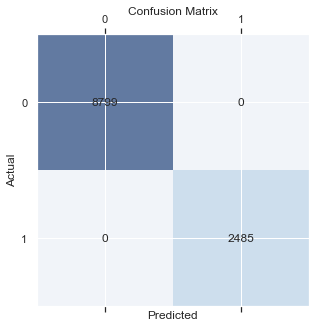

In [40]:
cm=confusion_matrix(ytest,pred)
fig,ax=plt.subplots(figsize=(5,5))
ax.matshow(cm,cmap=plt.cm.Blues,alpha=0.6)
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        ax.text(x=j,y=i,s=cm[i,j],va='center',ha='center')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()
        

11284/11284 [==============================] - 1s 117us/step


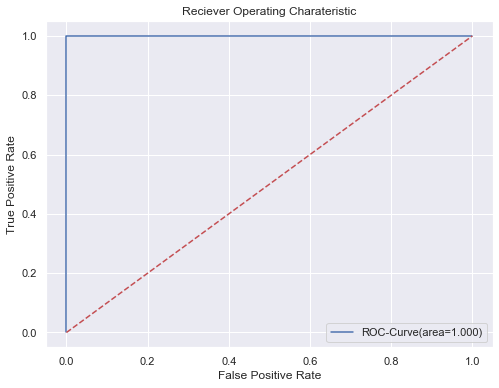

In [43]:
plt.figure(figsize=(8,6))
auc=roc_auc_score(ytest,pred)
fpr,tpr,thr=roc_curve(ytest,estimator.predict_proba(xtest)[:,1])
plt.plot(fpr,tpr,label='ROC-Curve(area=%0.3f)'% auc)
plt.plot([0,1],[0,1],'r--')
plt.title('Reciever Operating Charateristic')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.show()